In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import shapiro
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
hr= pd.read_csv("hr train data.csv")
hr.head()

,sno,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


In [3]:
hr.columns

Index(['sno', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sno                     19158 non-null  int64  
 1   enrollee_id             19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   city_development_index  19158 non-null  float64
 4   gender                  19158 non-null  object 
 5   relevent_experience     19158 non-null  object 
 6   enrolled_university     18772 non-null  object 
 7   education_level         19158 non-null  object 
 8   major_discipline        19158 non-null  object 
 9   experience              19093 non-null  float64
 10  company_size            13220 non-null  object 
 11  company_type            13018 non-null  object 
 12  last_new_job            18735 non-null  object 
 13  training_hours          19158 non-null  int64  
 14  job_change              19158 non-null

In [5]:
(hr.isnull().sum()/len(hr))*100

sno                        0.000000
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        2.014824
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [6]:
hr.drop(["sno","enrollee_id"], axis=1, inplace=True)

In [7]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [8]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [9]:
hr.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


## columns with unique values in them

In [10]:
hr.nunique()# unique values count

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 21
company_size                8
company_type                6
last_new_job                6
training_hours            241
job_change                  2
dtype: int64

##### Null value imputation for enrolled university

In [11]:
hr.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [12]:
pd.set_option("display.max_rows", None)

In [13]:
hr.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [14]:
hr.enrolled_university.fillna("no_enrollment",inplace=True)

In [15]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

##### Null value imputation for last new job

In [16]:
hr.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [17]:
hr.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [18]:
hr[(hr.relevent_experience=="No relevent experience") & (hr.last_new_job=="never")].count()

city                      1751
city_development_index    1751
gender                    1751
relevent_experience       1751
enrolled_university       1751
education_level           1751
major_discipline          1751
experience                1744
company_size               170
company_type               377
last_new_job              1751
training_hours            1751
job_change                1751
dtype: int64

In [19]:
hr[(hr.relevent_experience=="Has relevent experience")]["last_new_job"].value_counts()

1        6018
>4       2765
2        2370
4         876
3         839
never     701
Name: last_new_job, dtype: int64

In [20]:
hr[(hr.relevent_experience=="Has relevent experience") & (hr.last_new_job.isnull())]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
58,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,Oct-49,Funded Startup,NaN,32,YES
205,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,NaN,7,YES
391,city_90,0.698,Male,Has relevent experience,Full time course,Masters,No Major,NaN,NaN,NaN,NaN,44,YES
575,city_45,0.890,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Pvt Ltd,NaN,62,NO
719,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11.0,NaN,NaN,NaN,11,YES
770,city_16,0.910,Male,Has relevent experience,Full time course,Masters,STEM,5.0,50-99,NaN,NaN,92,NO
891,city_146,0.735,Male,Has relevent experience,Full time course,Graduate,STEM,3.0,100-500,NaN,NaN,18,NO
909,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,5000-9999,Pvt Ltd,NaN,14,NO
994,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,100-500,NaN,NaN,37,YES
1187,city_74,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,Oct-49,NaN,NaN,57,NO


<AxesSubplot:>

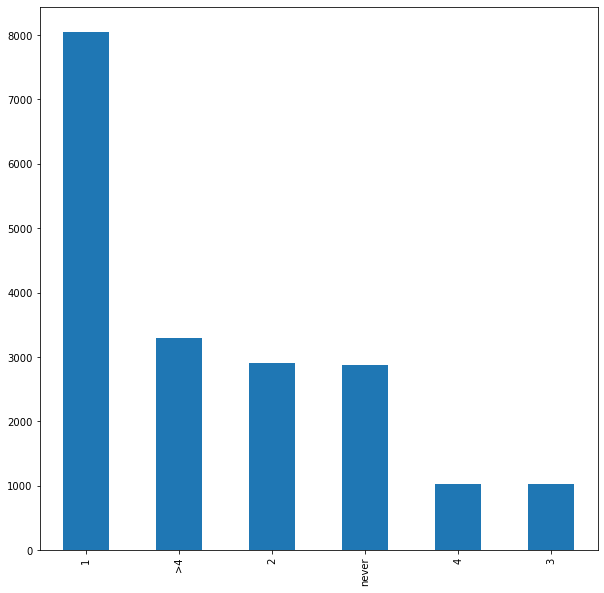

In [21]:
hr.last_new_job.fillna("never").value_counts().plot.bar() 
# checking if filling with never will make changes in overall distribution 

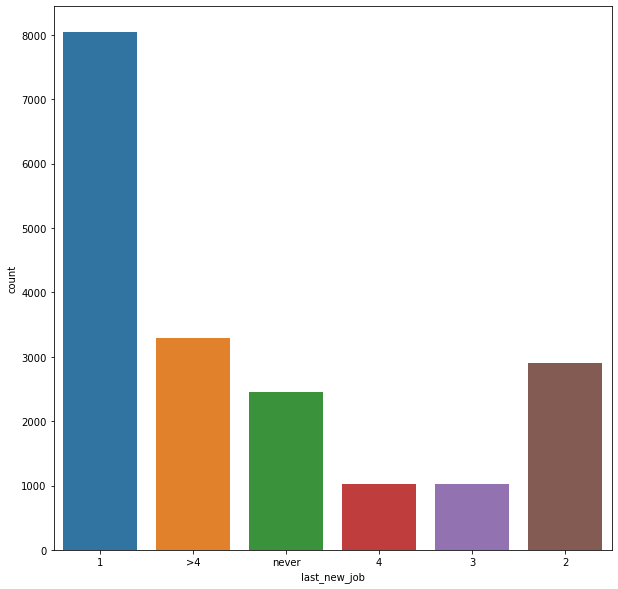

In [22]:
sns.countplot(x="last_new_job", data=hr) #distrbution without filling na with never
plt.show()

In [23]:
hr.last_new_job.fillna("never",inplace=True)

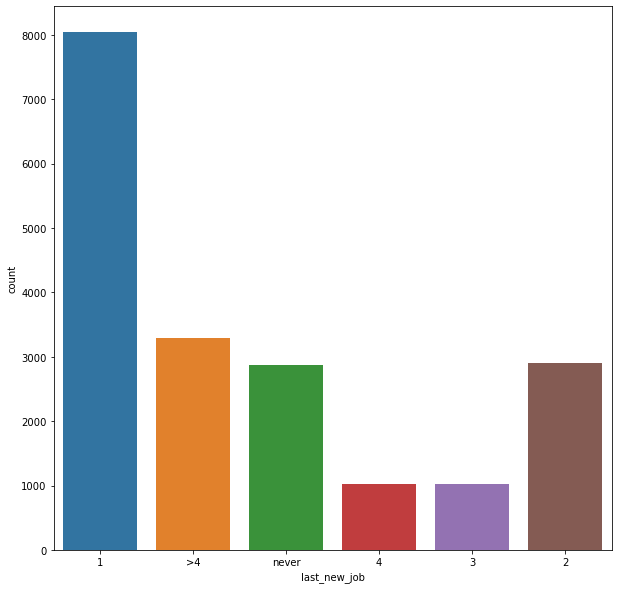

In [24]:
sns.countplot(x="last_new_job", data=hr) # dist still intact
plt.show()

##### null value imputation for company type

In [25]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               0.000000
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [26]:
hr.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [27]:
hr.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [28]:
hr.company_type.fillna("Other", inplace=True) #if compnay_type not known make sense to fill with other 

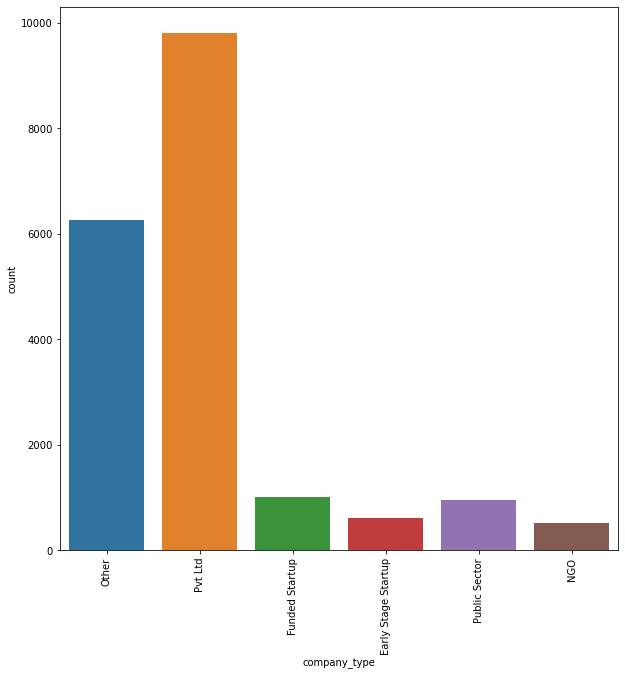

In [29]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()

##### Null value imputation for experience

In [30]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                  65
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

In [31]:
hr.experience.unique()

array([20., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., nan])

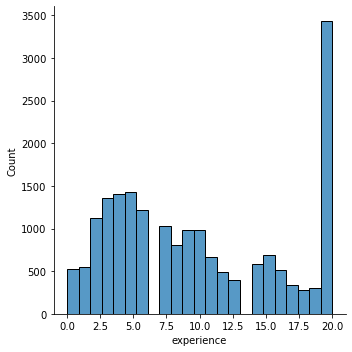

In [32]:
sns.displot(hr.experience)
plt.show()

In [33]:
hr.groupby("relevent_experience")["experience"].median()

relevent_experience
Has relevent experience    10.0
No relevent experience      4.0
Name: experience, dtype: float64

In [34]:
hr.loc[(hr.relevent_experience=="Has relevent experience") & (hr.experience.isnull()), "experience"]=10.0
hr.loc[(hr.relevent_experience=="No relevent experience") & (hr.experience.isnull()), "experience"]=4.0

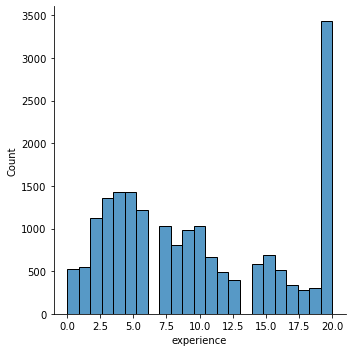

In [35]:
sns.displot(hr.experience)
plt.show()

In [36]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

##### Null value imputation for company size

In [37]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [38]:
hr.company_size= hr.company_size.str.replace("Oct-49","49")

In [39]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
49           1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [40]:
hr.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '49',
       '100-500', '500-999'], dtype=object)

In [41]:
hr[hr.company_size.isnull()]["company_type"].value_counts()

Other                  5368
Pvt Ltd                 406
Public Sector           129
NGO                      26
Funded Startup            6
Early Stage Startup       3
Name: company_type, dtype: int64

In [42]:
hr.groupby("company_type")["company_size"].value_counts()

company_type         company_size
Early Stage Startup  <10              286
                     49               176
                     50-99            109
                     100-500           27
                     500-999            2
Funded Startup       50-99            390
                     100-500          214
                     49               193
                     <10              144
                     500-999           54
NGO                  100-500          174
                     50-99             77
                     1000-4999         73
                     10000+            37
                     500-999           37
                     <10               36
                     49                32
                     5000-9999         29
Other                50-99            240
                     100-500          172
                     49               117
                     10000+            93
                     <10               79


In [43]:
hr.groupby("company_type")["company_size"].count()

company_type
Early Stage Startup     600
Funded Startup          995
NGO                     495
Other                   893
Public Sector           826
Pvt Ltd                9411
Name: company_size, dtype: int64

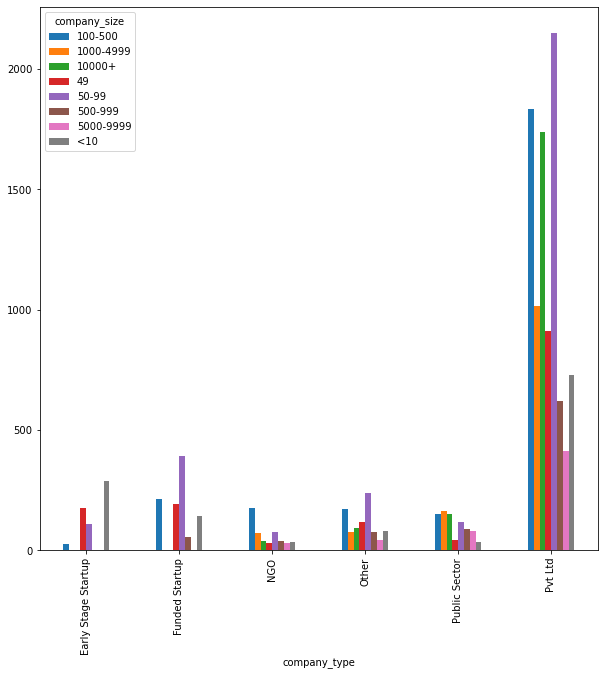

In [44]:
pd.crosstab(hr.company_type,hr.company_size).plot.bar()
plt.show()

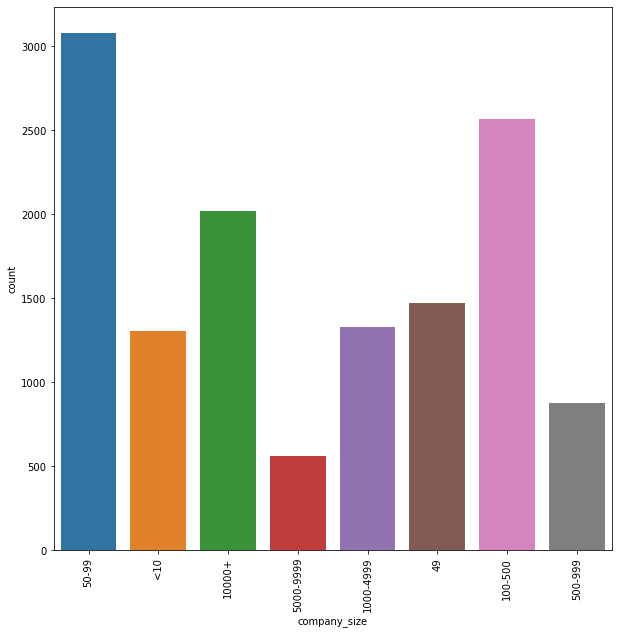

In [45]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()

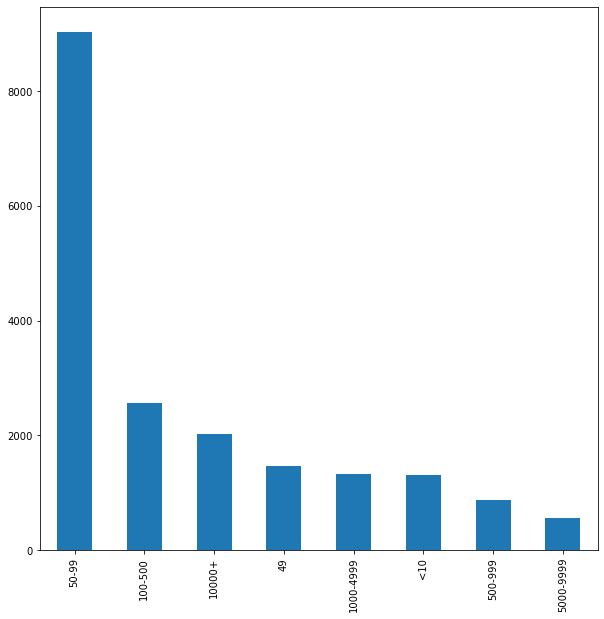

In [46]:
hr.company_size.fillna("50-99").value_counts().plot.bar() 
plt.show()
# if we fill by 50-90 the count of 50-90 will drastically increase from 3000 to 8000

In [47]:
hr.loc[(hr.company_type=="Other") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Early Stage Startup") & (hr.company_size.isnull()), "company_size"]="<10"
hr.loc[(hr.company_type=="Funded Startup") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Public Sector") & (hr.company_size.isnull()), "company_size"]="1000-4999"
hr.loc[(hr.company_type=="NGO") & (hr.company_size.isnull()), "company_size"]="100-500"
hr.loc[(hr.company_type=="Pvt Ltd") & (hr.company_size.isnull()), "company_size"]="50-99"

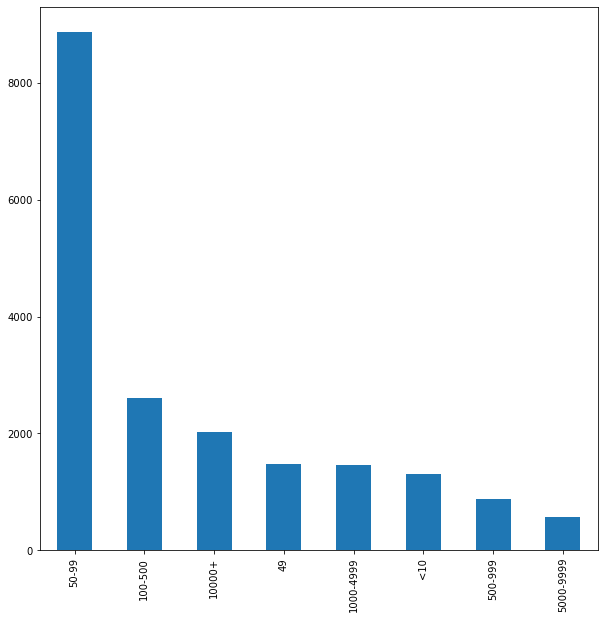

In [48]:
hr.company_size.value_counts().plot.bar()
plt.show()

## outliers in the data 

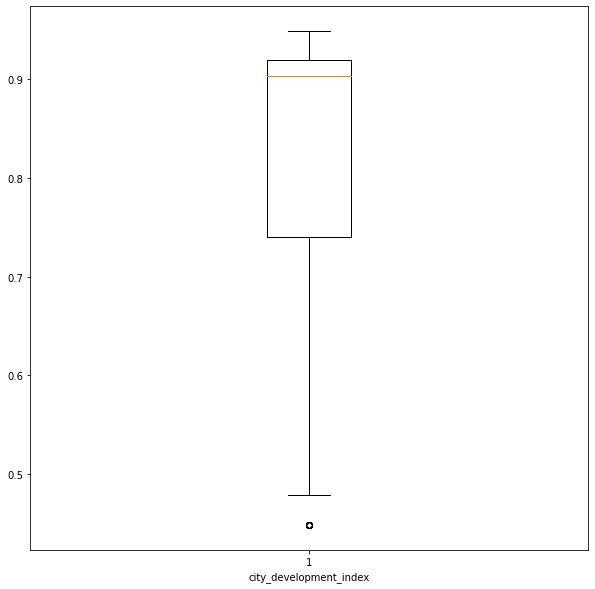

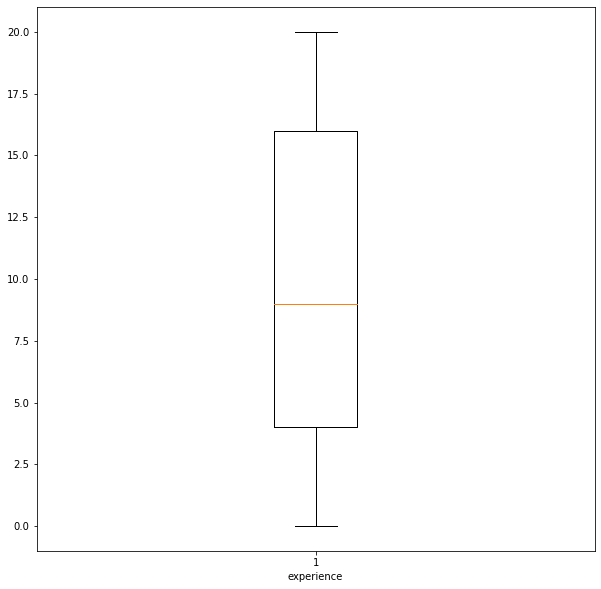

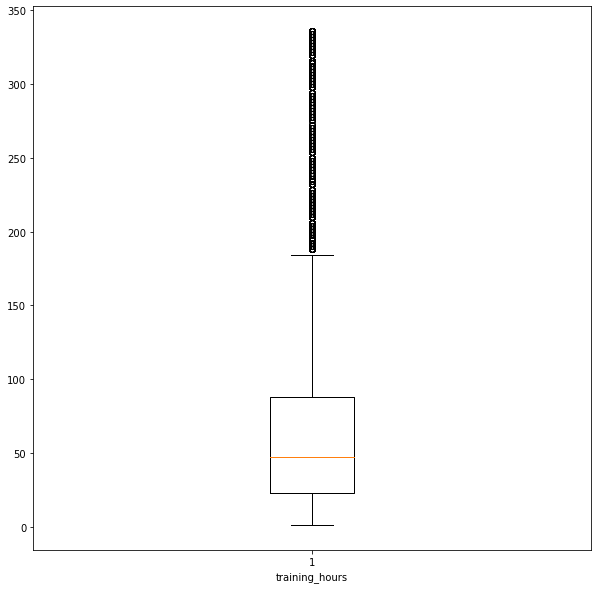

In [49]:
for i in hr.select_dtypes(include=np.number).columns:
    plt.boxplot(hr[i])
    plt.xlabel(i)
    plt.show()

## UNIVARIATE ANALYSIS

### CATEGORICAL COL

In [50]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [51]:
def uni_cat(x):
    sns.countplot(x=x, data=hr)
    plt.show()
    print(hr[x].value_counts(normalize=True)*100)
    print("the category with highest number of frequency is ",hr[x].mode()[0])

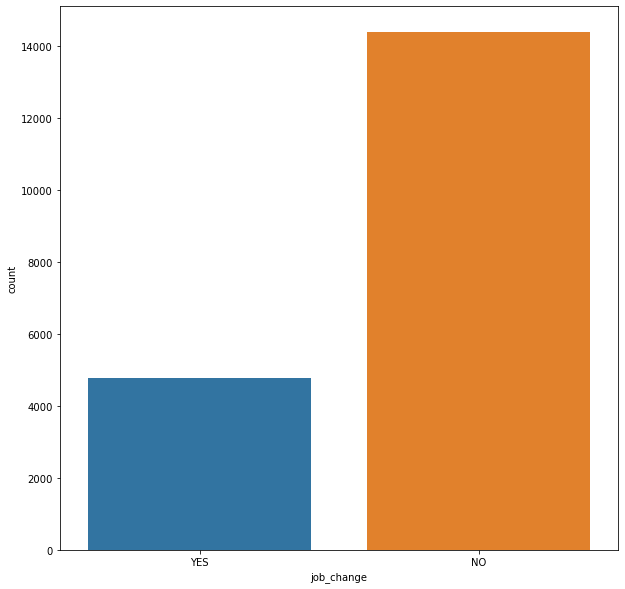

NO     75.065247
YES    24.934753
Name: job_change, dtype: float64
the category with highest number of frequency is  NO


In [52]:
uni_cat("job_change")

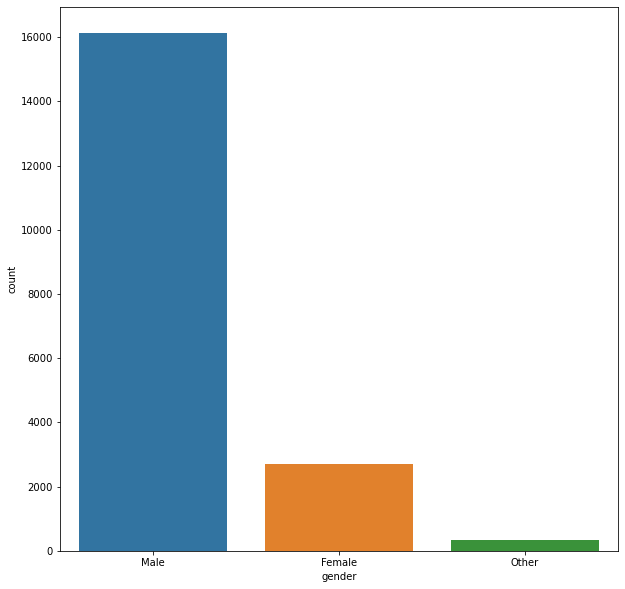

Male      84.173713
Female    14.046351
Other      1.779935
Name: gender, dtype: float64
the category with highest number of frequency is  Male


In [53]:
uni_cat("gender")

In [54]:
hr.gender.value_counts(1)

Male      0.841737
Female    0.140464
Other     0.017799
Name: gender, dtype: float64

In [55]:
hr.groupby("gender")["job_change"].value_counts()

gender  job_change
Female  NO             1935
        YES             756
Male    NO            12208
        YES            3918
Other   NO              238
        YES             103
Name: job_change, dtype: int64

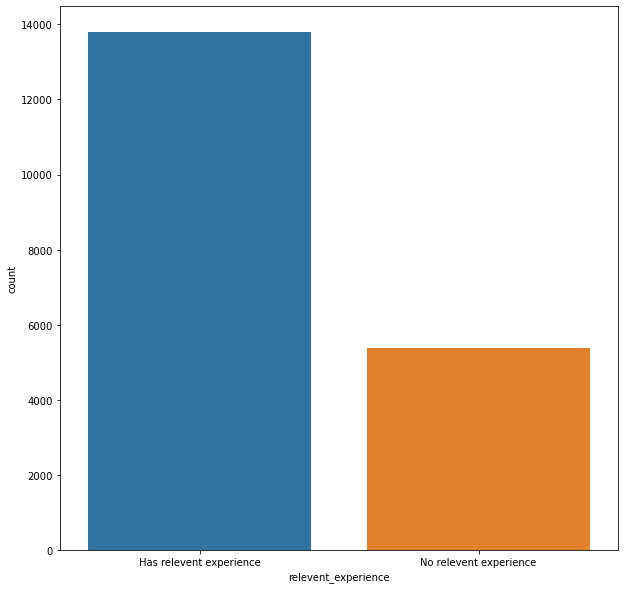

Has relevent experience    71.990813
No relevent experience     28.009187
Name: relevent_experience, dtype: float64
the category with highest number of frequency is  Has relevent experience


In [56]:
uni_cat("relevent_experience")

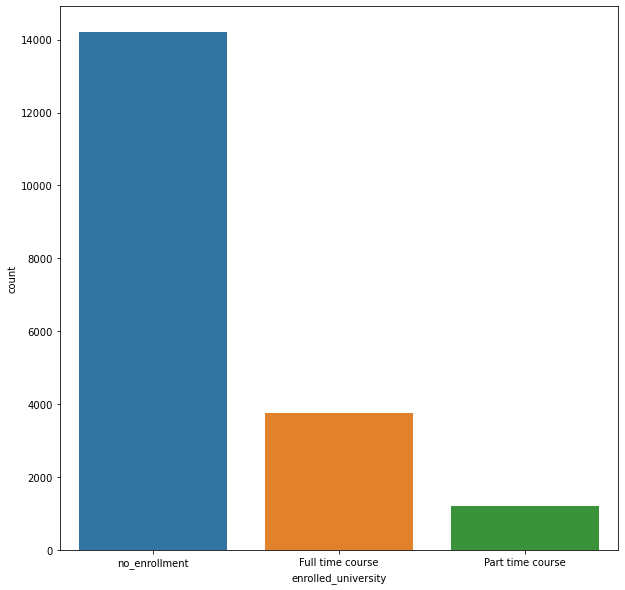

no_enrollment       74.136131
Full time course    19.610607
Part time course     6.253262
Name: enrolled_university, dtype: float64
the category with highest number of frequency is  no_enrollment


In [57]:
uni_cat("enrolled_university")

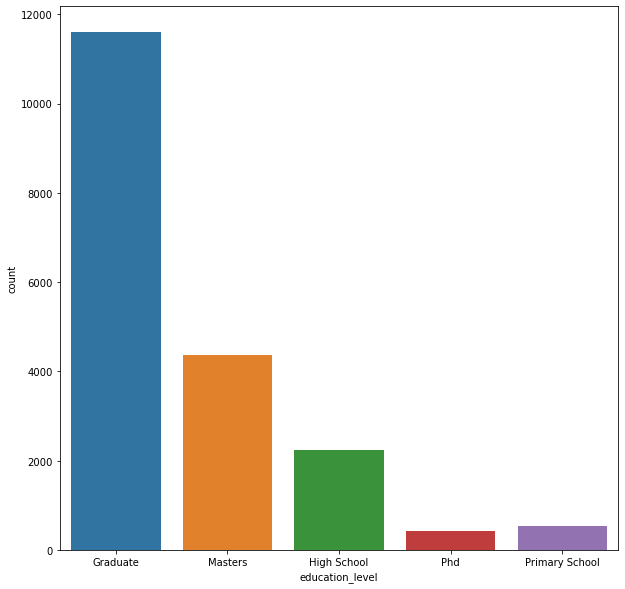

Graduate          60.538678
Masters           22.763336
High School       11.728782
Primary School     2.808226
Phd                2.160977
Name: education_level, dtype: float64
the category with highest number of frequency is  Graduate


In [58]:
uni_cat("education_level")

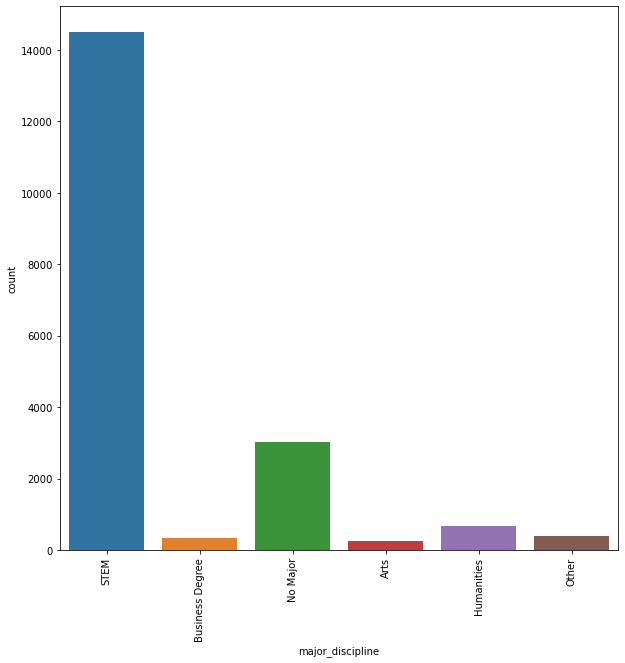

STEM               75.644639
No Major           15.847166
Humanities          3.492014
Other               1.988725
Business Degree     1.706859
Arts                1.320597
Name: major_discipline, dtype: float64
the category with highest number of frequency is  STEM


In [59]:
sns.countplot(x="major_discipline", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["major_discipline"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["major_discipline"].mode()[0])

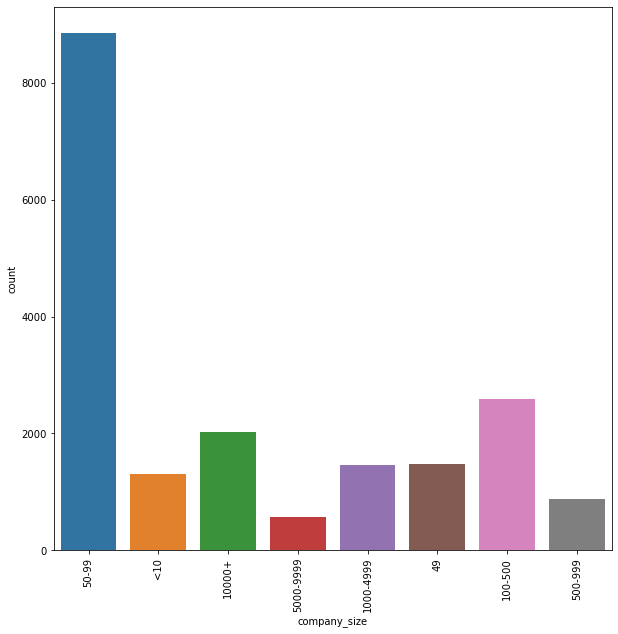

50-99        46.262658
100-500      13.555695
10000+       10.538678
49            7.678255
1000-4999     7.605178
<10           6.843094
500-999       4.577722
5000-9999     2.938720
Name: company_size, dtype: float64
the category with highest number of frequency is  50-99


In [60]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_size"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_size"].mode()[0])

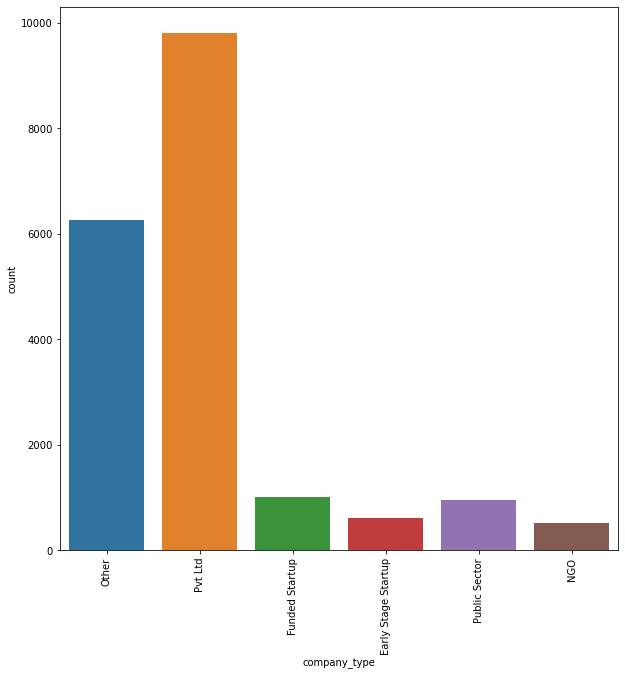

Pvt Ltd                51.242301
Other                  32.680864
Funded Startup          5.224971
Public Sector           4.984863
Early Stage Startup     3.147510
NGO                     2.719491
Name: company_type, dtype: float64
the category with highest number of frequency is  Pvt Ltd


In [61]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_type"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_type"].mode()[0])

### NUMERICAL COL

In [62]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [63]:
def uni_num(x):
    sns.displot(hr[x])
    plt.show()
    sns.boxplot(x=x,data=hr)
    plt.show()
    print("skewness of the ",x,"column is ",hr[x].skew())
    probplot(hr[x],plot=plt)
    plt.show()

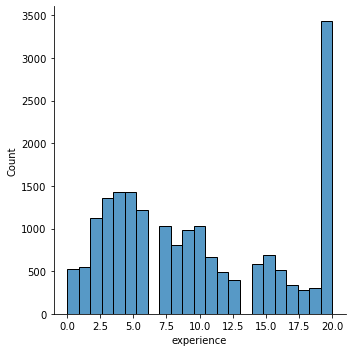

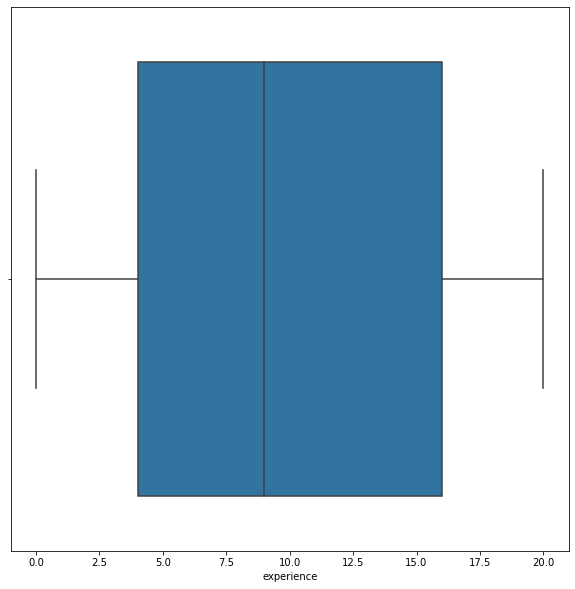

skewness of the  experience column is  0.3410292909488931


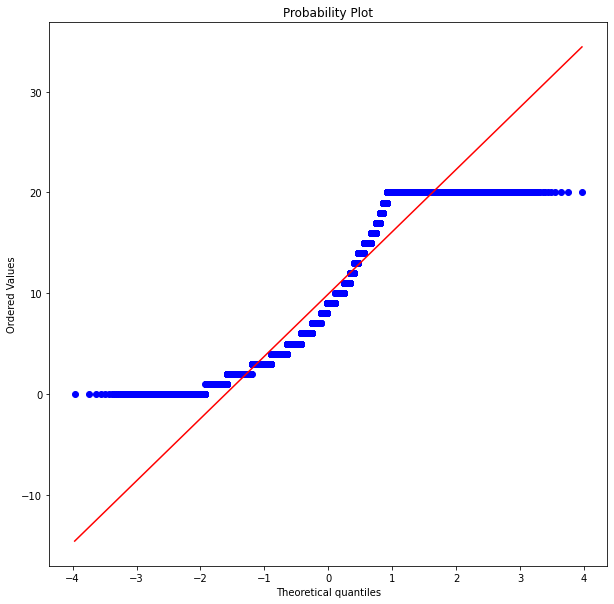

In [64]:
uni_num("experience")

In [65]:
hr.experience.describe()

count    19158.000000
mean         9.921704
std          6.497186
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         20.000000
Name: experience, dtype: float64

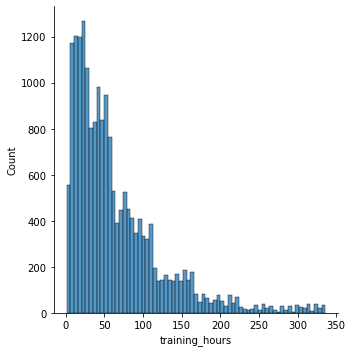

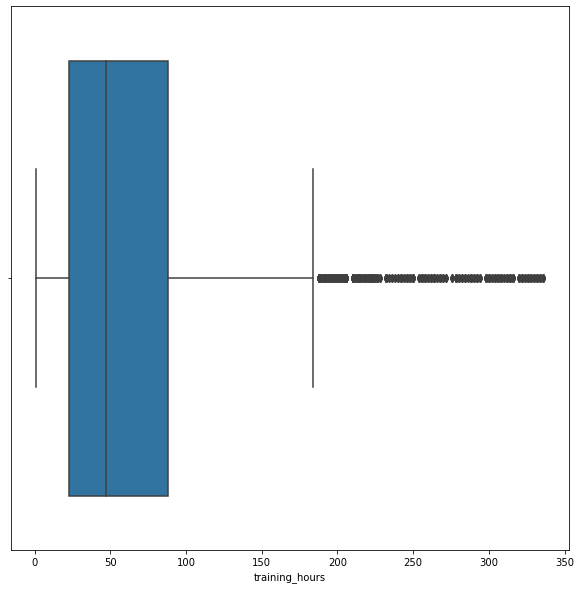

skewness of the  training_hours column is  1.8192372420221026


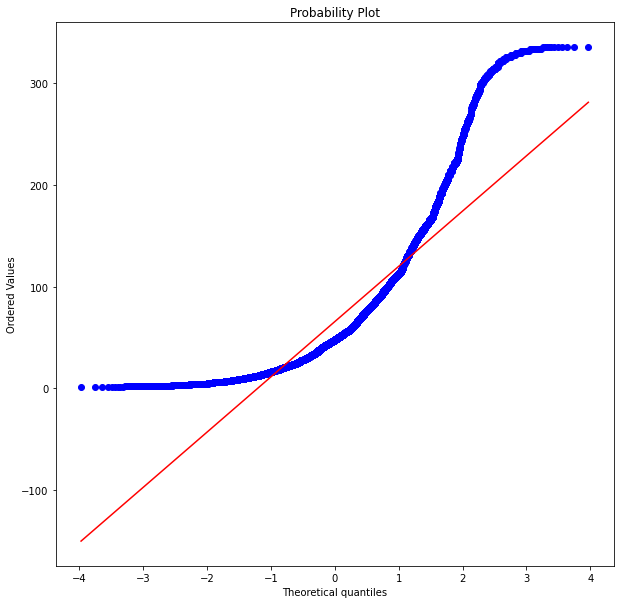

In [66]:
uni_num("training_hours")

In [67]:
hr.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

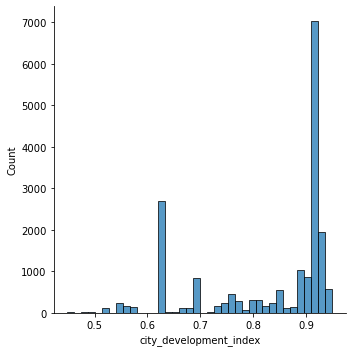

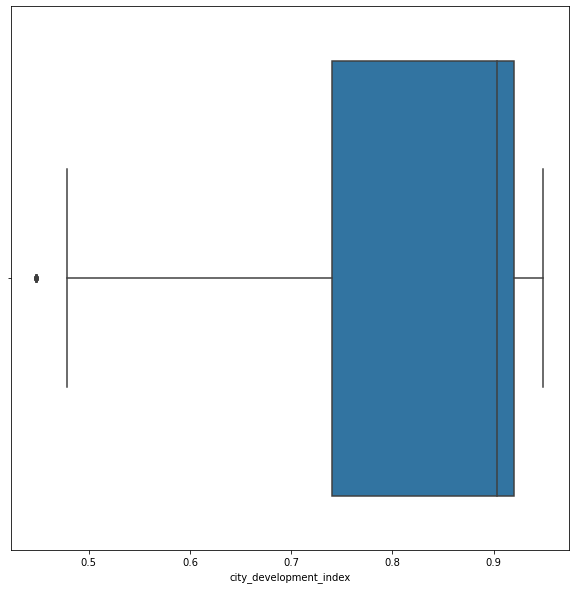

skewness of the  city_development_index column is  -0.9954275351977435


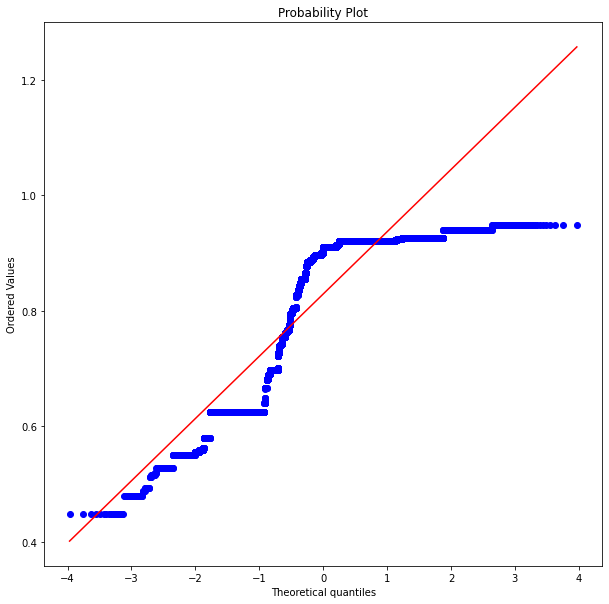

In [68]:
uni_num("city_development_index")

### BIVARIATE ANALYSIS

#### NUM VS NUM

In [69]:
def binum(x,y):
    sns.scatterplot(x=x,y=y,data=hr)
    plt.show()

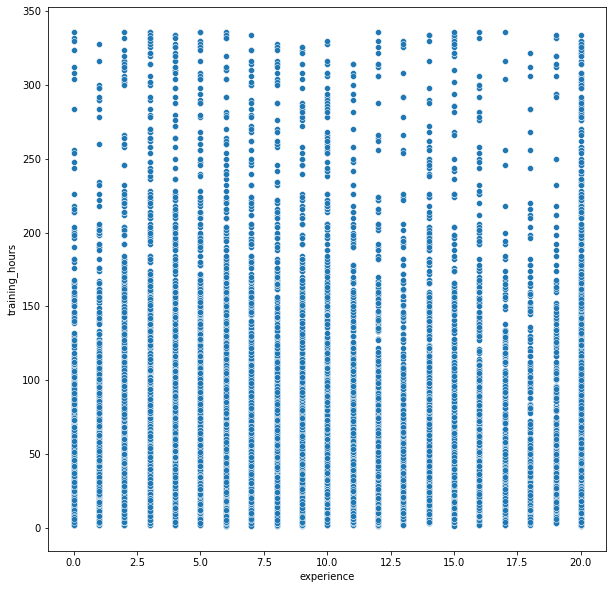

In [70]:
binum("experience","training_hours")

#### NUM VS CAT

In [71]:
def catvnum(x,y):
    sns.boxplot(x=x,y=y,data=hr)
    plt.show()

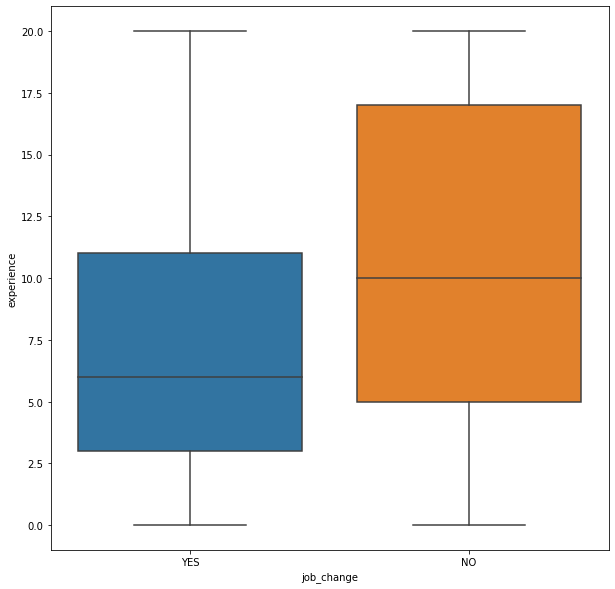

In [72]:
catvnum("job_change","experience")

In [73]:
hr.groupby("job_change")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,10.588068,6.491032,0.0,5.0,10.0,17.0,20.0
YES,4777.0,7.915637,6.091035,0.0,3.0,6.0,11.0,20.0


In [74]:
hr.groupby("job_change")["experience"].skew()

job_change
NO     0.208524
YES    0.798224
Name: experience, dtype: float64

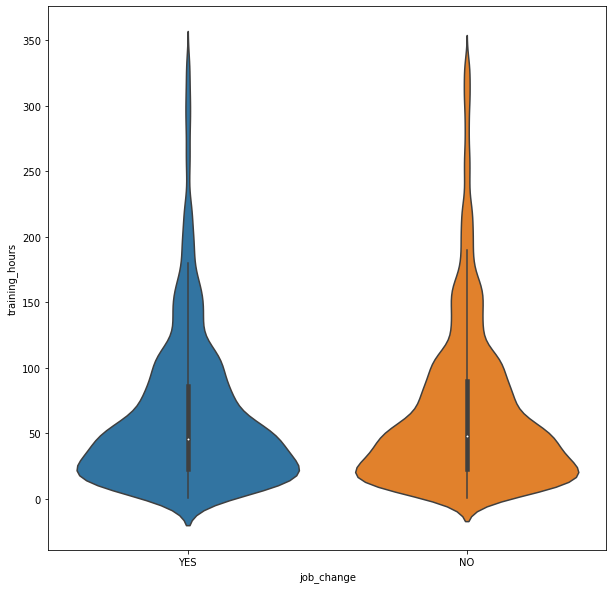

In [75]:
sns.violinplot(x="job_change",y="training_hours",data=hr)
plt.show()

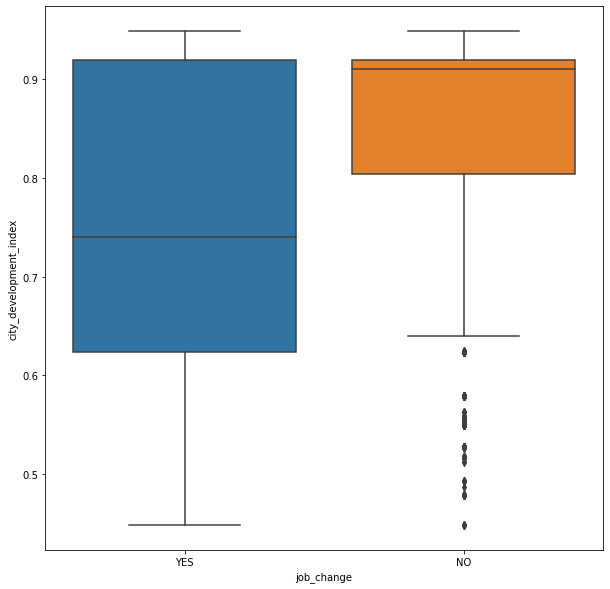

In [76]:
catvnum("job_change","city_development_index")

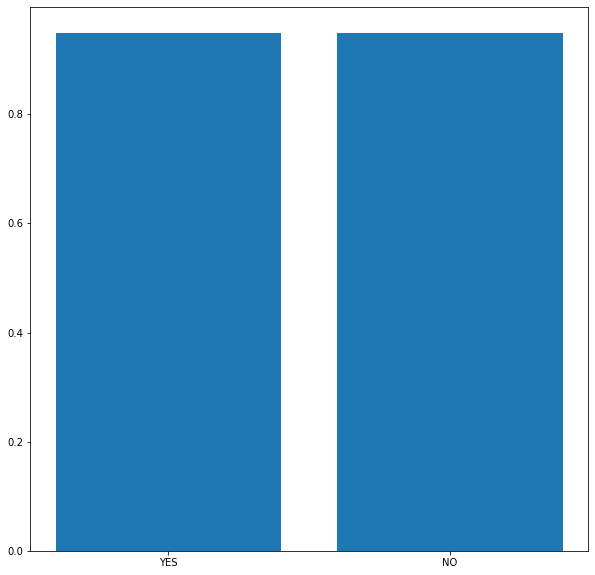

In [77]:
plt.bar(hr["job_change"], hr["city_development_index"])
plt.show()

In [78]:
hr.groupby("job_change")["city_development_index"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,0.853139,0.105354,0.448,0.804,0.91,0.92,0.949
YES,4777.0,0.755719,0.143166,0.448,0.624,0.74,0.92,0.949


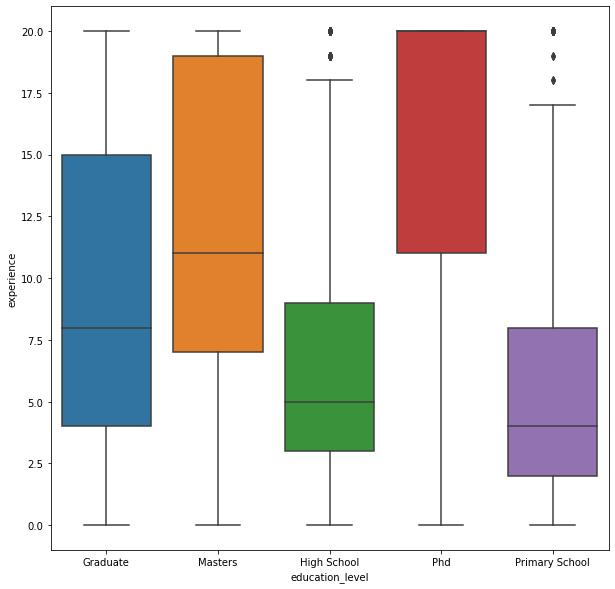

In [79]:
catvnum("education_level","experience")

In [80]:
hr.groupby("education_level")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Graduate,11598.0,9.811433,6.384456,0.0,4.0,8.0,15.0,20.0
High School,2247.0,6.512239,5.479965,0.0,3.0,5.0,9.0,20.0
Masters,4361.0,11.860812,6.298473,0.0,7.0,11.0,19.0,20.0
Phd,414.0,15.917874,5.580407,0.0,11.0,20.0,20.0,20.0
Primary School,538.0,6.206320,5.746037,0.0,2.0,4.0,8.0,20.0


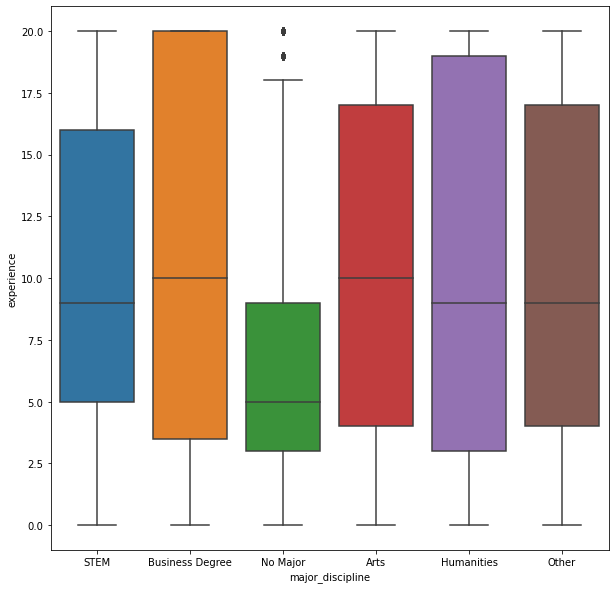

In [81]:
catvnum("major_discipline","experience")

In [82]:
hr.groupby("major_discipline")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
major_discipline,,,,,,,,
Arts,253.0,10.288538,6.890855,0.0,4.0,10.0,17.0,20.0
Business Degree,327.0,10.727829,7.460073,0.0,3.5,10.0,20.0,20.0
Humanities,669.0,10.168909,7.397393,0.0,3.0,9.0,19.0,20.0
No Major,3036.0,6.798419,5.789004,0.0,3.0,5.0,9.0,20.0
Other,381.0,10.149606,6.822654,0.0,4.0,9.0,17.0,20.0
STEM,14492.0,10.534019,6.366014,0.0,5.0,9.0,16.0,20.0


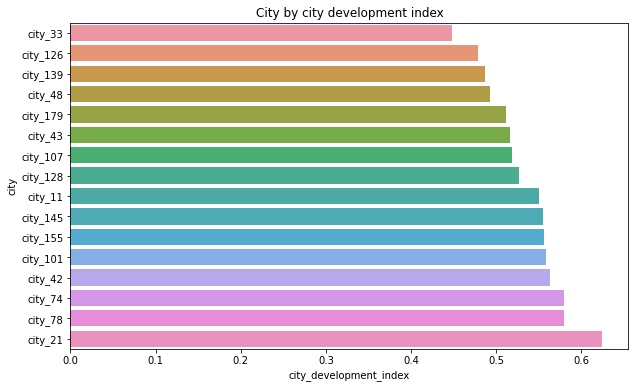

In [83]:
cdi = hr.sort_values(by='city_development_index', ascending=True)[0:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=hr.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

##### CAT VS CAT

In [84]:
def crosstab(x,y):
    print(pd.crosstab(x,y,normalize="index")*100)
    pd.crosstab(x,y,normalize="index").plot(kind='bar')

job_change         NO        YES
gender                          
Female      71.906355  28.093645
Male        75.703832  24.296168
Other       69.794721  30.205279


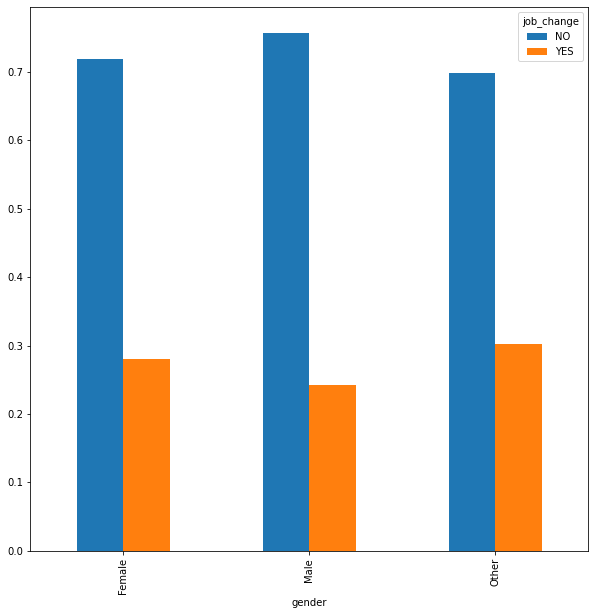

In [85]:
crosstab(hr.gender,hr.job_change)

job_change                      NO        YES
relevent_experience                          
Has relevent experience  78.531032  21.468968
No relevent experience   66.157287  33.842713


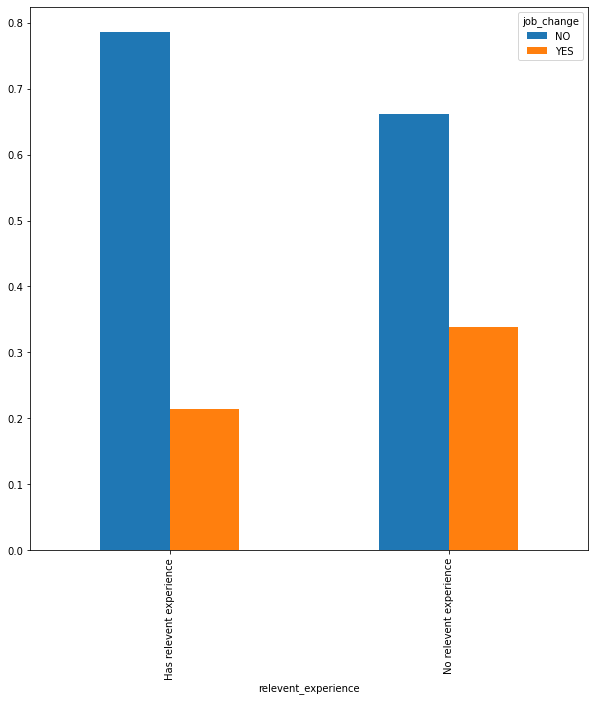

In [86]:
crosstab(hr.relevent_experience,hr.job_change)

job_change                  NO        YES
enrolled_university                      
Full time course     61.911099  38.088901
Part time course     74.791319  25.208681
no_enrollment        78.567908  21.432092


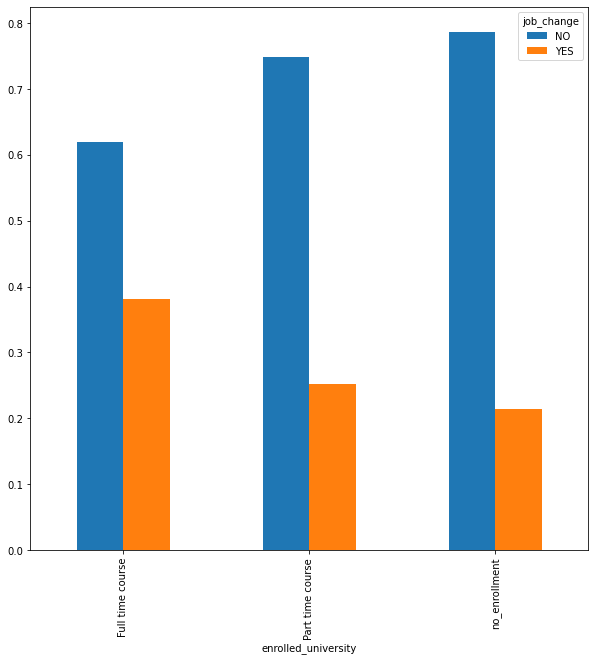

In [87]:
crosstab(hr.enrolled_university,hr.job_change)

job_change               NO        YES
major_discipline                      
Arts              79.051383  20.948617
Business Degree   73.700306  26.299694
Humanities        78.923767  21.076233
No Major          80.105402  19.894598
Other             73.228346  26.771654
STEM              73.840740  26.159260


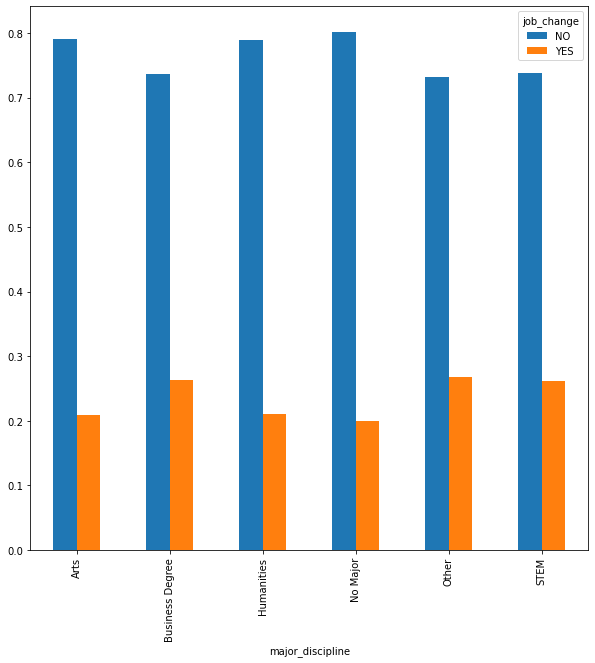

In [88]:
crosstab(hr.major_discipline,hr.job_change,)

job_change              NO        YES
education_level                      
Graduate         72.021038  27.978962
High School      79.839786  20.160214
Masters          78.559963  21.440037
Phd              85.990338  14.009662
Primary School   84.014870  15.985130


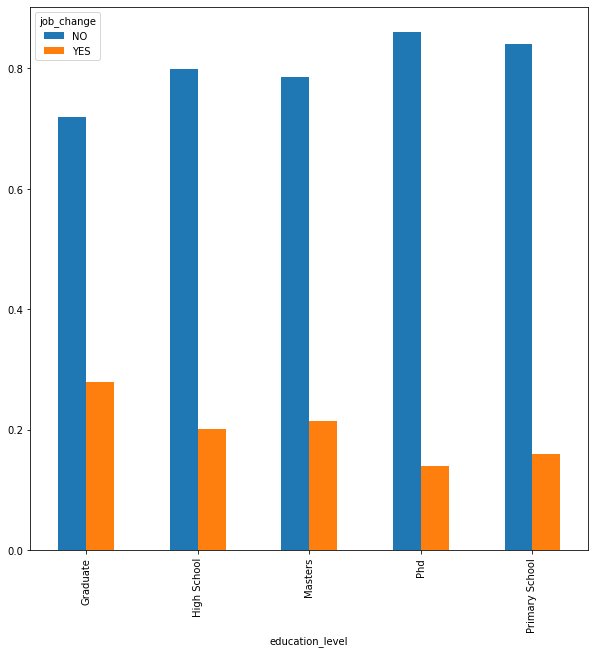

In [89]:
crosstab(hr.education_level,hr.job_change)

<Figure size 1440x1440 with 0 Axes>

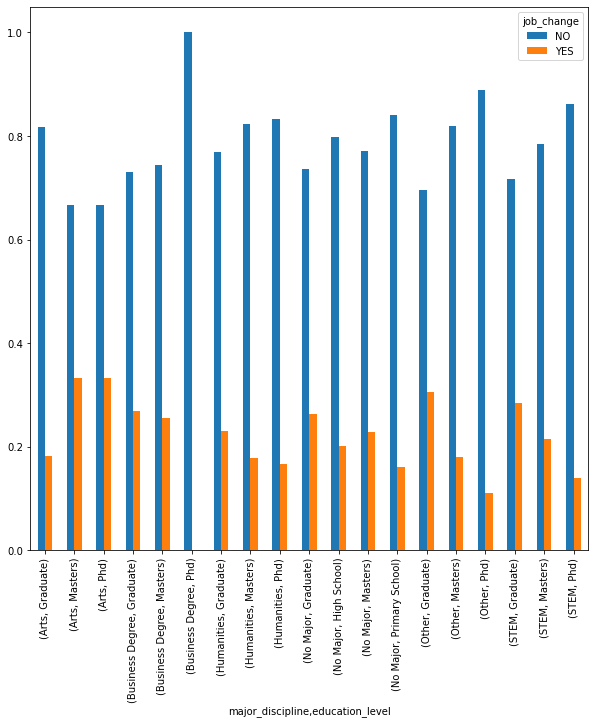

In [90]:
plt.figure(figsize=[20,20])
hr.groupby(["major_discipline","education_level"])["job_change"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.show()

job_change           NO        YES
company_size                      
100-500       83.634963  16.365037
1000-4999     82.566918  17.433082
10000+        80.931154  19.068846
49            76.614548  23.385452
50-99         67.403814  32.596186
500-999       82.668187  17.331813
5000-9999     81.882771  18.117229
<10           82.761251  17.238749


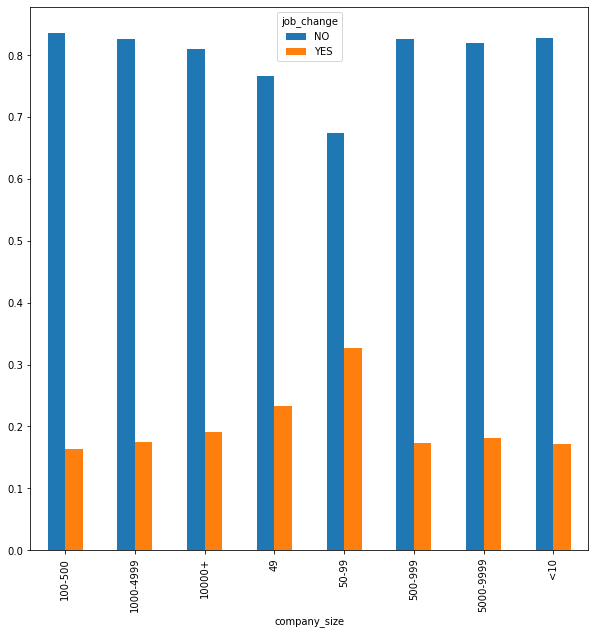

In [91]:
crosstab(hr.company_size,hr.job_change)

job_change                  NO        YES
company_type                             
Early Stage Startup  76.451078  23.548922
Funded Startup       86.013986  13.986014
NGO                  81.381958  18.618042
Other                61.459831  38.540169
Public Sector        78.010471  21.989529
Pvt Ltd              81.919120  18.080880


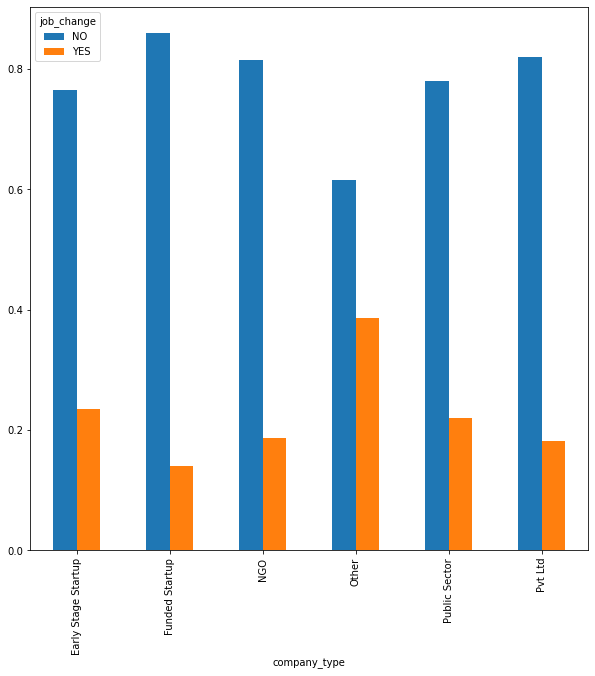

In [92]:
crosstab(hr.company_type,hr.job_change)

job_change           NO        YES
last_new_job                      
1             73.569652  26.430348
2             75.862069  24.137931
3             77.441406  22.558594
4             77.842566  22.157434
>4            81.762918  18.237082
never         68.939130  31.060870


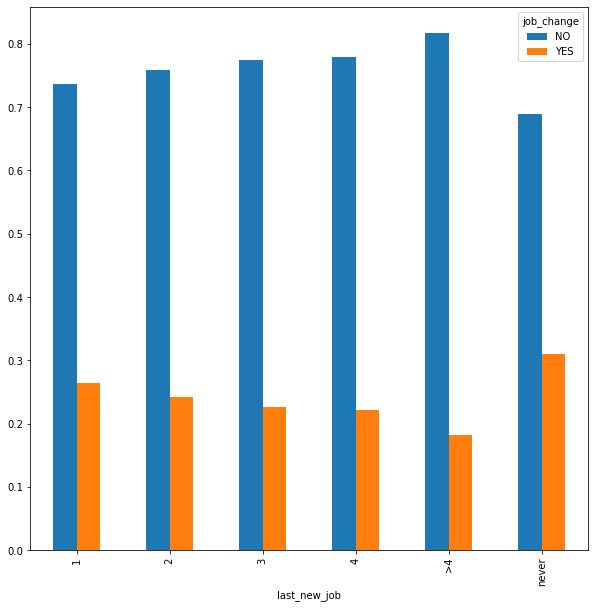

In [93]:
crosstab(hr.last_new_job,hr.job_change)

In [94]:
hr.groupby(["major_discipline"])["training_hours"].mean()

major_discipline
Arts               60.272727
Business Degree    66.189602
Humanities         65.635277
No Major           66.324111
Other              66.049869
STEM               65.206390
Name: training_hours, dtype: float64

In [95]:
hr.groupby(["education_level",])["training_hours"].mean()

education_level
Graduate          65.773409
High School       67.120605
Masters           63.270809
Phd               67.524155
Primary School    64.609665
Name: training_hours, dtype: float64

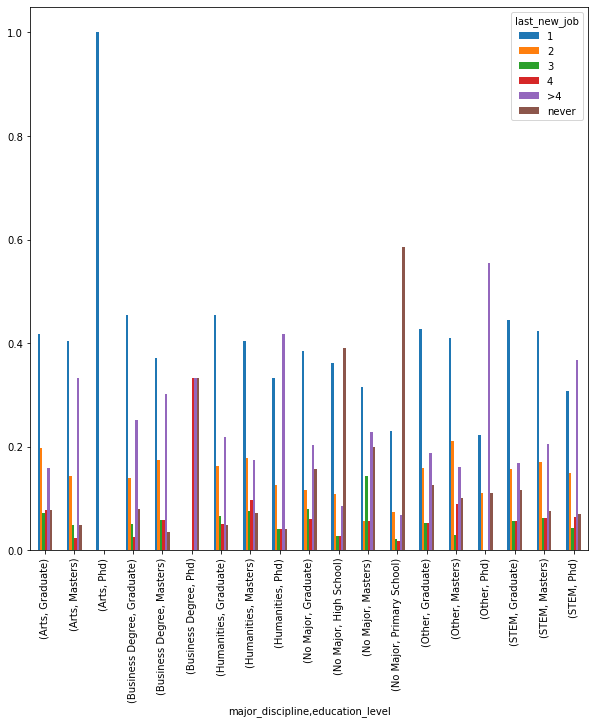

In [96]:
pd.crosstab([hr.major_discipline,hr.education_level],hr.last_new_job,normalize="index").plot.bar()
plt.show()

* 1.The percentage ratio for job change of Yes to No is 24:75.
* 2.The no. of employess working in diff sectors are mostly males then female followed by others.
* 3.The gender looking for job change in increasing order is given by : other> female> male
* 4.People with no relevant experience are more likely to look for job.
* 5.The max no. of candidates have graduate degree followed by masters and lowest level of education is primary school.
* 6.Candidates with no major followed by stem and other as major discipline are enrolled in full time courses more lieky to pursure some form of higher education to upskill themseleves.
* 7.The 30% graduates with other as major discipline are actively looking for job change followed by 28% of graduates with stem as major dicipline as compare to other education level.
* 8.Highly educated individuals and those with less education are likely to be more steady in their current work compared to graduates, post graduates, high schools.  
* 9.On an average employees with 8 years of experience are willing for job change.
* 10.All major discipline have a avg mean training time of 65-68 hrs
*  => graduates are the ones that require the highest traing time 
*  => we can also seee that phd as education level requires less training time as comapred to the rest

In [97]:
hr.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Other,never,83,NO
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52,YES
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


# STATISTICS

<AxesSubplot:>

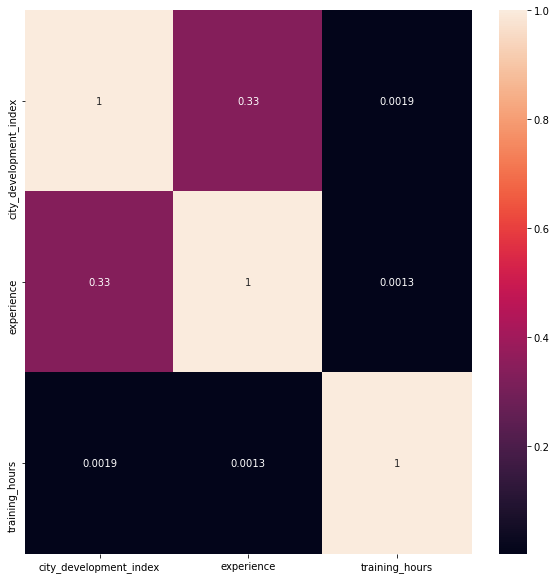

In [98]:
pd.options.display.max_columns=None
plt.figure(figsize=(10,10))
sns.heatmap(hr.corr(),annot=True)

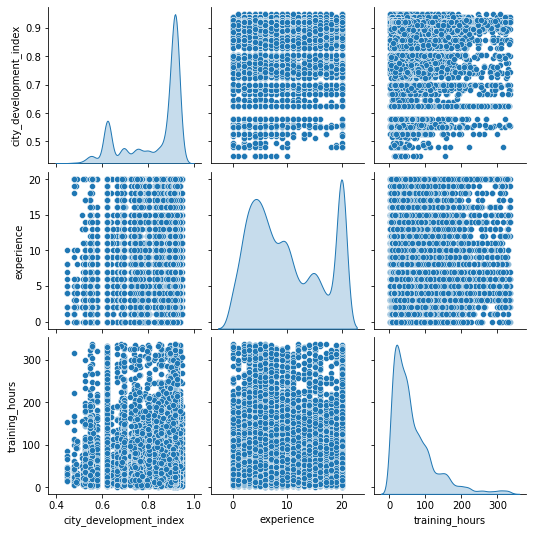

In [99]:
sns.pairplot(hr, diag_kind="kde")
plt.show()

In [100]:
hr.std()

city_development_index     0.123362
experience                 6.497186
training_hours            60.058462
dtype: float64

In [101]:
hr.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,job_change
count,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,3,2,3,5,6,8,6,6,2
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,1,NO
freq,4355,16126,13792,14203,11598,14492,8863,9817,8040,14381


In [102]:
hr.drop("city",inplace=True, axis=1)

### Independance of attributes of categorical columns

H0: Cat columns are independant

H1: Cat columsn are dependant

In [103]:
from scipy.stats import chi2_contingency

In [104]:
cat= hr.drop("job_change", axis=1).select_dtypes(include="object").columns
cat

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')

In [105]:
for i in cat:
    obs= pd.crosstab(hr[i],hr.job_change)
    sts, pvalue, ddof, exp= chi2_contingency(obs)
    print(i,"is", pvalue)

gender is 1.0541322646977614e-05
relevent_experience is 1.5006628411178982e-70
enrolled_university is 2.267945402973493e-96
education_level is 3.9147580257452785e-34
major_discipline is 6.56029585540239e-12
company_size is 1.5236345116667286e-113
company_type is 3.2029488094685203e-202
last_new_job is 1.5317467805104205e-31


H0: mu1 = mu2

H1: mu1 <> mu2

In [106]:
y=hr[hr["job_change"]=="YES"]["training_hours"]
n=hr[hr["job_change"]=="NO"]["training_hours"]
from scipy import stats
stats, pvalue= stats.ttest_ind(y,n)
if pvalue<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


H0: mu=8
    
H1: mu<>8

In [107]:
samp=hr.loc[hr.job_change=="YES","experience"]

In [108]:
samp.mean()

7.915637429348964

In [109]:
from scipy import stats
t_stat, p_val = stats.ttest_1samp(samp, popmean = 8)
if p_val<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


In [110]:
hr.gender.value_counts()

Male      16126
Female     2691
Other       341
Name: gender, dtype: int64

In [111]:
hr.select_dtypes(include="object").columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [112]:
hr.corr()

,city_development_index,experience,training_hours
city_development_index,1.000000,0.333866,0.001920
experience,0.333866,1.000000,0.001326
training_hours,0.001920,0.001326,1.000000


In [113]:
from scipy import stats

In [114]:
z= stats.zscore(hr.training_hours)

In [115]:
hr[z>3]["training_hours"].min()

246

# FEATURE ENGINEERING

In [116]:
encode=pd.get_dummies(hr[['gender', 'relevent_experience',
       'enrolled_university', 'major_discipline', 'company_type']],drop_first=True)
len(encode.columns)

15

In [117]:
hr.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Other,never,83,NO
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52,YES
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


In [118]:
hr=pd.concat([hr,encode],axis=1)
hr.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [119]:
hr.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1


## dummy encoding

In [120]:
encode=pd.get_dummies(hr[['gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']],
                      drop_first=True)

In [121]:
hr.drop(['gender', 'relevent_experience',
             'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job'],
        axis=1,inplace=True)

In [122]:
hr.job_change.replace({"YES":1,"NO":0},inplace=True)

In [123]:
hr.shape

(19158, 19)

## Correaltion matrix after dummy encoding

<AxesSubplot:>

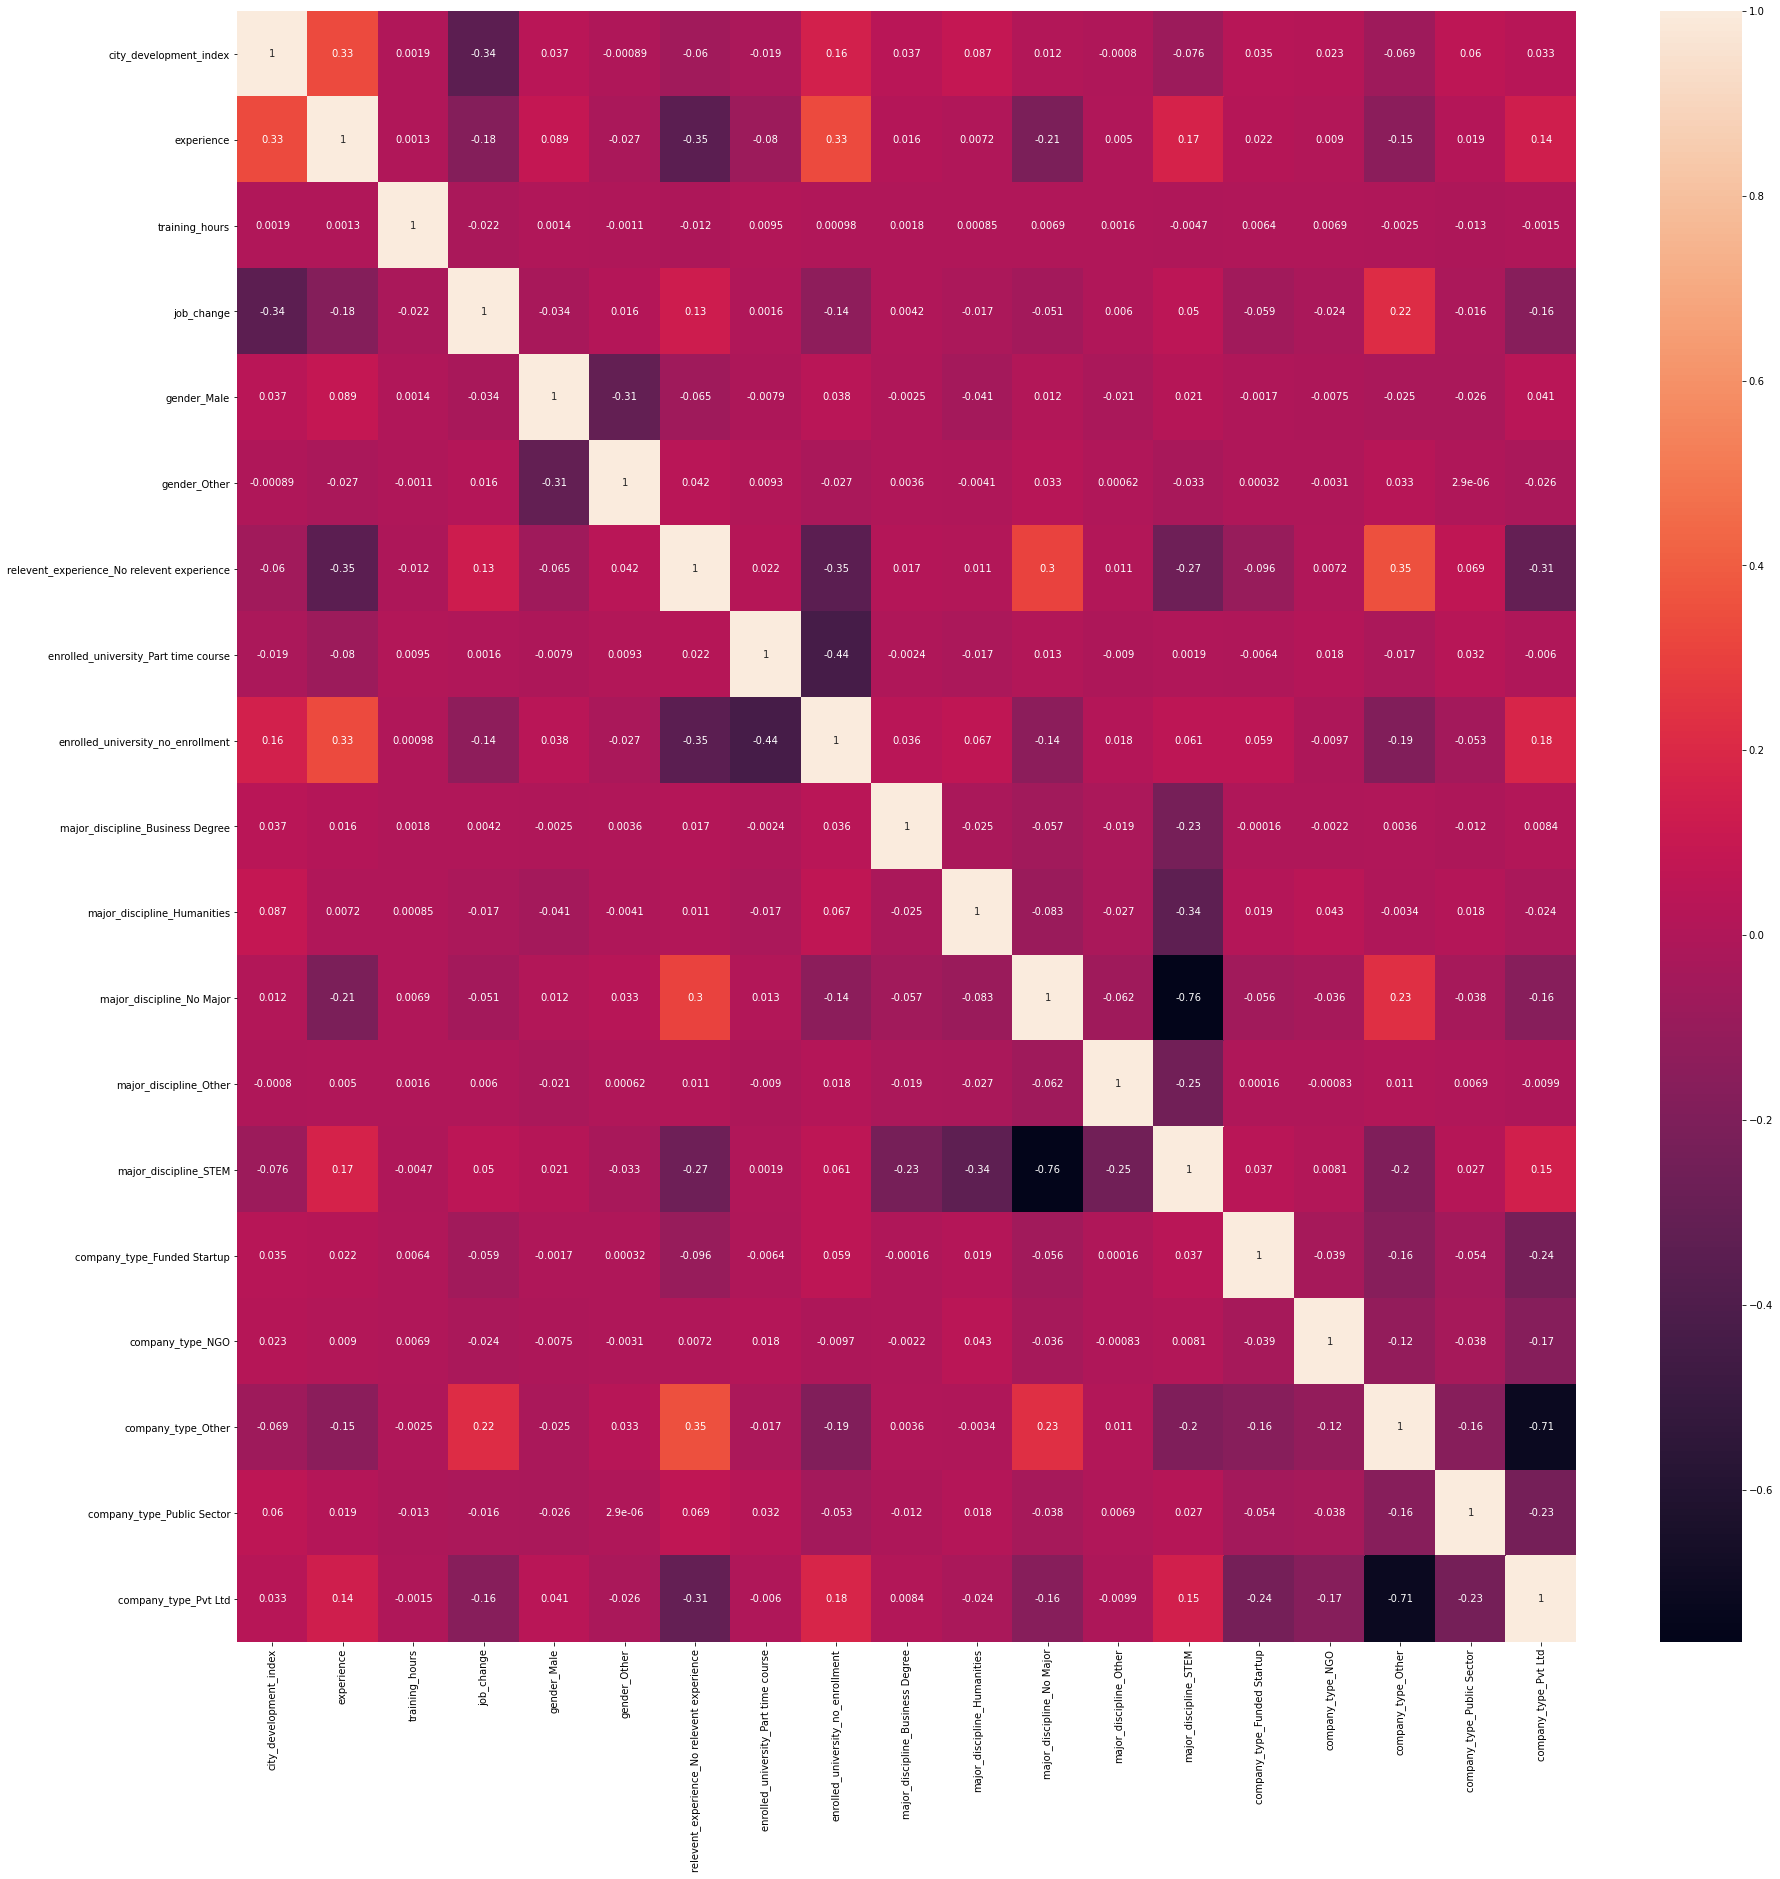

In [124]:
pd.options.display.max_columns=None
plt.figure(figsize=(30,30))
sns.heatmap(hr.corr(),annot=True)

In [125]:
#job change correlation
hr.corr()["job_change"]

city_development_index                       -0.341665
experience                                   -0.177957
training_hours                               -0.021577
job_change                                    1.000000
gender_Male                                  -0.034040
gender_Other                                  0.016400
relevent_experience_No relevent experience    0.128430
enrolled_university_Part time course          0.001635
enrolled_university_no_enrollment            -0.137071
major_discipline_Business Degree              0.004157
major_discipline_Humanities                  -0.016965
major_discipline_No Major                    -0.050555
major_discipline_Other                        0.006048
major_discipline_STEM                         0.049881
company_type_Funded Startup                  -0.059421
company_type_NGO                             -0.024412
company_type_Other                            0.219113
company_type_Public Sector                   -0.015593
company_ty

# MACHINE LEARNING

In [126]:
# all libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [127]:
hr.head(2)

,city_development_index,experience,training_hours,job_change,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,20.0,36,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0.776,15.0,47,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [128]:
#dataframe for all the data collected 
Score=pd.DataFrame(columns=["Name","Train Score","Test Score","Precision Score","Recall Score","F1-Score","ROC - AUC","TN","FP","FN","TP"])
CV_Score=pd.DataFrame(columns=["Name","CV-Train Score","CV-Test Score","CV-Precision Score","CV-Recall Score","CV-F1-Score","CV-ROC - AUC"])

Score.head(1)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP


# Logistic Regression

In [129]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lr=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
proba=lr.predict_proba(X_test)[:,1]
print("trian score : ",lr.score(X_train,y_train))
print("test score : ",lr.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr0,tpr0,thresh=roc_curve(y_test,proba)

trian score :  0.766801513767454
test score :  0.7656576200417536

confusion matrix : 
  [[2719  184]
 [ 714  215]]

precision score : 0.5388471177944862
recall score :  0.23143164693218515
f1 score :  0.3237951807228916
auc :  0.7610737861838482

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2903
           1       0.54      0.23      0.32       929

    accuracy                           0.77      3832
   macro avg       0.67      0.58      0.59      3832
weighted avg       0.73      0.77      0.73      3832



In [130]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [131]:
Score = Score.append({"Name":"Logistic Regression",
             'Train Score':lr.score(X_train,y_train),
             'Test Score':lr.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [132]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215


#### impt features

In [133]:
ser=pd.Series(np.exp(lr.coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            3.655468
major_discipline_Business Degree              1.954555
company_type_Public Sector                    1.863883
major_discipline_Other                        1.859301
major_discipline_STEM                         1.839640
major_discipline_Humanities                   1.673715
gender_Other                                  1.296452
relevent_experience_No relevent experience    1.273461
company_type_Pvt Ltd                          1.214197
company_type_NGO                              1.031106
training_hours                                0.999260
experience                                    0.974609
gender_Male                                   0.966289
enrolled_university_no_enrollment             0.884839
enrolled_university_Part time course          0.830448
company_type_Funded Startup                   0.782123
major_discipline_No Major                     0.694204
city_development_index                        0.005541
dtype: flo

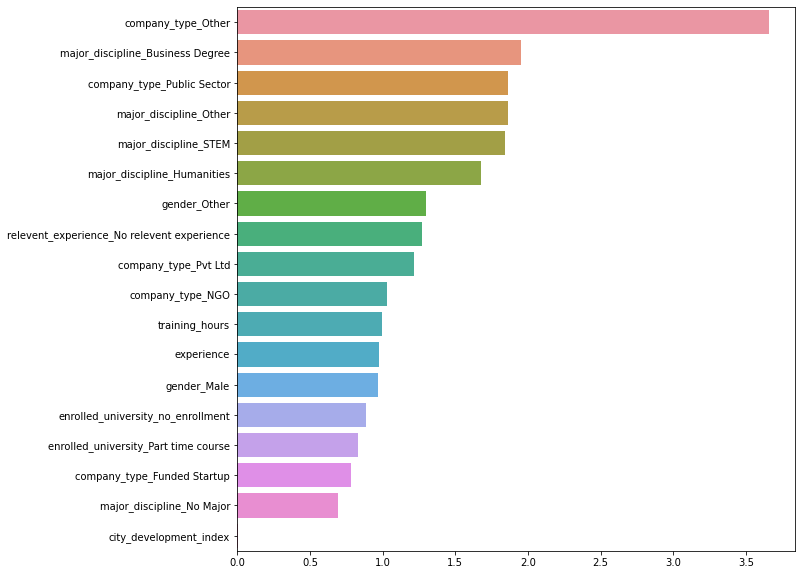

In [134]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Decision tree 

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
dt=DecisionTreeClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
proba=dt.predict_proba(X_test)[:,1]
print("trian score : ",dt.score(X_train,y_train))
print("test score : ",dt.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr2,tpr2,thresh=roc_curve(y_test,proba)

trian score :  0.9865587889860368
test score :  0.7168580375782881

confusion matrix : 
  [[2358  545]
 [ 540  389]]

precision score : 0.4164882226980728
recall score :  0.418729817007535
auc :  0.6198099883309904

classification report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      2903
           1       0.42      0.42      0.42       929

    accuracy                           0.72      3832
   macro avg       0.62      0.62      0.62      3832
weighted avg       0.72      0.72      0.72      3832



In [137]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [138]:
Score = Score.append({"Name":"Decision Tree ",
             'Train Score':dt.score(X_train,y_train),
             'Test Score':dt.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [139]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389


In [140]:
ser=pd.Series(dt.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major_discipline_No Major                     0.024054
major_discipline_STEM                         0.015944
company_type_Pvt Ltd                          0.014491
enrolled_university_Part time course          0.009937
major_discipline_Humanities                   0.007016
company_type_Funded Startup                   0.006648
company_type_NGO                              0.006305
major_discipline_Other                        0.005372
gender_Other                                  0.005045
company_type_Public Sector                    0.003989
major_discipline_Business Degree              0.003964
dtype: flo

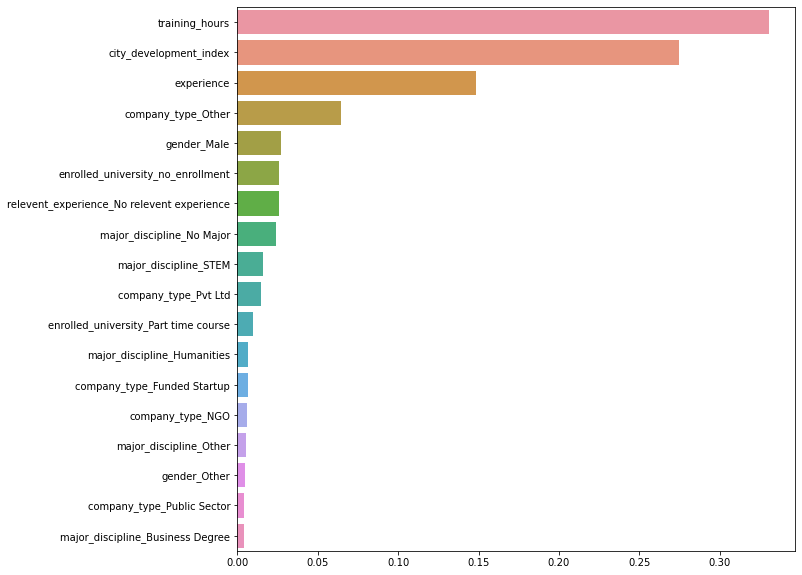

In [141]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
rf=RandomForestClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
proba=rf.predict_proba(X_test)[:,1]
print("trian score : ",rf.score(X_train,y_train))
print("test score : ",rf.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr4,tpr4,thresh=roc_curve(y_test,proba)

trian score :  0.9865587889860368
test score :  0.7669624217118998

confusion matrix : 
  [[2545  358]
 [ 535  394]]

precision score : 0.523936170212766
recall score :  0.4241119483315393
auc :  0.757277742819777

classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      2903
           1       0.52      0.42      0.47       929

    accuracy                           0.77      3832
   macro avg       0.68      0.65      0.66      3832
weighted avg       0.75      0.77      0.76      3832



In [144]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [145]:
Score = Score.append({"Name":"Random Forest Classifier ",
             'Train Score':rf.score(X_train,y_train),
             'Test Score':rf.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [146]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394


In [147]:
ser=pd.Series(rf.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                0.369593
city_development_index                        0.286564
experience                                    0.164966
company_type_Other                            0.040367
relevent_experience_No relevent experience    0.019956
enrolled_university_no_enrollment             0.018712
gender_Male                                   0.017859
company_type_Pvt Ltd                          0.017229
major_discipline_No Major                     0.013955
major_discipline_STEM                         0.012226
enrolled_university_Part time course          0.008244
company_type_Public Sector                    0.005140
company_type_Funded Startup                   0.005032
gender_Other                                  0.004940
major_discipline_Humanities                   0.004321
major_discipline_Business Degree              0.003698
company_type_NGO                              0.003663
major_discipline_Other                        0.003534
dtype: flo

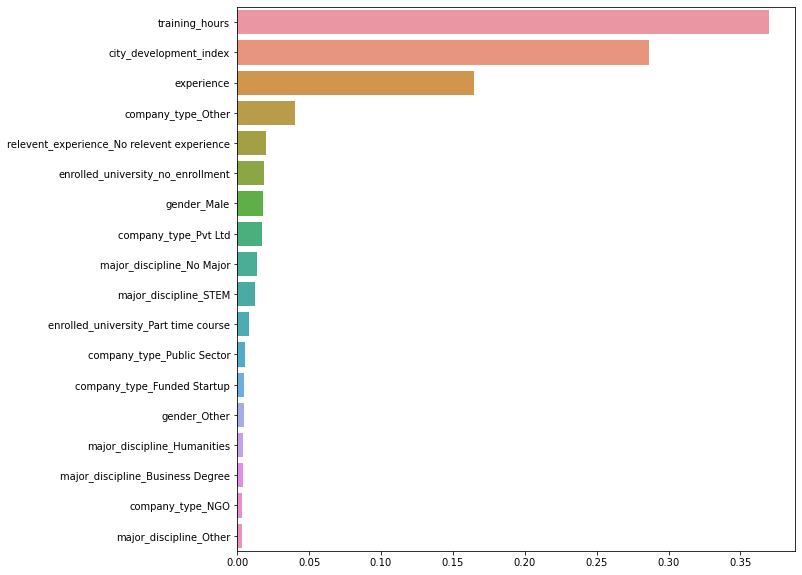

In [148]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# AdaBoost

In [149]:
from sklearn.ensemble import AdaBoostClassifier

In [150]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
ad=AdaBoostClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
proba=ad.predict_proba(X_test)[:,1]
print("trian score : ",ad.score(X_train,y_train))
print("test score : ",ad.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr6,tpr6,thresh=roc_curve(y_test,proba)

trian score :  0.7765888033407282
test score :  0.7784446764091858

confusion matrix : 
  [[2712  191]
 [ 658  271]]

precision score : 0.5865800865800865
recall score :  0.2917115177610334
auc :  0.7849913622632316

classification report : 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2903
           1       0.59      0.29      0.39       929

    accuracy                           0.78      3832
   macro avg       0.70      0.61      0.63      3832
weighted avg       0.75      0.78      0.75      3832



In [151]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [152]:
Score = Score.append({"Name":"AdaBoost Classifier ",
             'Train Score':ad.score(X_train,y_train),
             'Test Score':ad.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [153]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271


In [154]:
ser=pd.Series(ad.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.38
training_hours                                0.34
experience                                    0.06
company_type_Other                            0.04
major_discipline_No Major                     0.04
enrolled_university_no_enrollment             0.04
company_type_Public Sector                    0.02
gender_Male                                   0.02
relevent_experience_No relevent experience    0.02
major_discipline_Business Degree              0.02
company_type_Funded Startup                   0.02
major_discipline_Humanities                   0.00
enrolled_university_Part time course          0.00
major_discipline_Other                        0.00
gender_Other                                  0.00
major_discipline_STEM                         0.00
company_type_NGO                              0.00
company_type_Pvt Ltd                          0.00
dtype: float64

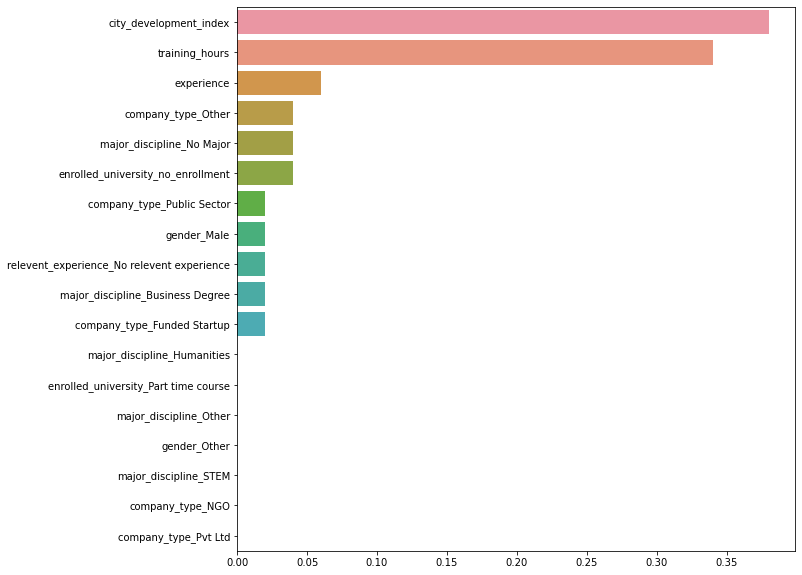

In [155]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Gradiant Boost 

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
gb=GradientBoostingClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
proba=gb.predict_proba(X_test)[:,1]
print("trian score : ",gb.score(X_train,y_train))
print("test score : ",gb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr7,tpr7,thresh=roc_curve(y_test,proba)

trian score :  0.796359128278742
test score :  0.7883611691022965

confusion matrix : 
  [[2576  327]
 [ 484  445]]

precision score : 0.5764248704663213
recall score :  0.4790096878363832
auc :  0.7874182344310311

classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2903
           1       0.58      0.48      0.52       929

    accuracy                           0.79      3832
   macro avg       0.71      0.68      0.69      3832
weighted avg       0.78      0.79      0.78      3832



In [158]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [159]:
Score = Score.append({"Name":"Gradiant Boosting Classifier ",
             'Train Score':gb.score(X_train,y_train),
             'Test Score':gb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [160]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271
4,Gradiant Boosting Classifier,0.796359,0.788361,0.576425,0.479010,0.523222,0.787418,2576,327,484,445


In [161]:
ser=pd.Series(gb.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.618834
company_type_Other                            0.224642
major_discipline_No Major                     0.067555
training_hours                                0.022196
experience                                    0.022056
relevent_experience_No relevent experience    0.016143
enrolled_university_no_enrollment             0.010922
company_type_Public Sector                    0.006387
major_discipline_STEM                         0.002638
major_discipline_Business Degree              0.001581
company_type_Funded Startup                   0.001568
company_type_Pvt Ltd                          0.001406
major_discipline_Other                        0.001293
gender_Other                                  0.000979
enrolled_university_Part time course          0.000932
gender_Male                                   0.000601
company_type_NGO                              0.000186
major_discipline_Humanities                   0.000083
dtype: flo

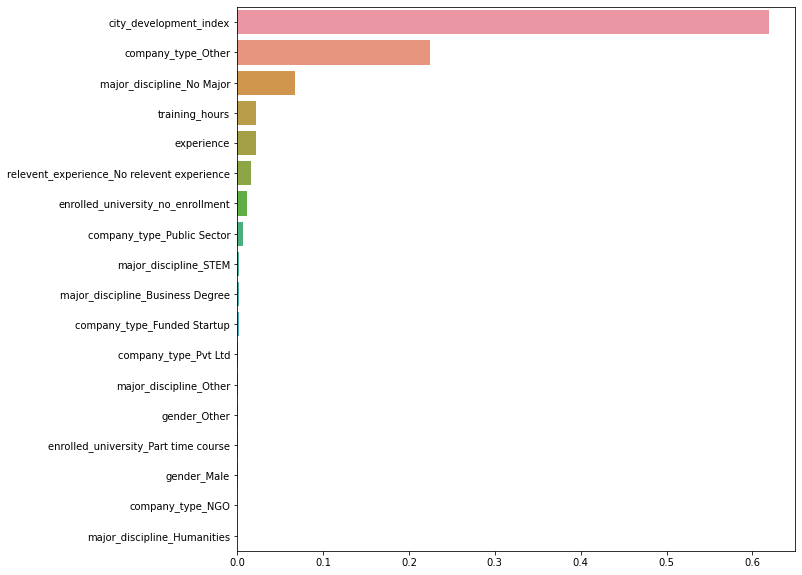

In [162]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# XGboost

In [163]:
! pip install xgboost
from xgboost import XGBClassifier

In [164]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'job_change',
       'gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd'],
      dtype='object')

In [165]:
hr.columns=hr.rename(columns={"last_new_job_>4":"last_new_job_more_than_4",'company_size_<10':'company_size_less_than_10'}).columns

In [166]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'job_change',
       'gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd'],
      dtype='object')

In [167]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[18:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.8618034712253686
test score :  0.7732254697286013

confusion matrix : 
  [[2534  369]
 [ 500  429]]

precision score : 0.5375939849624061
recall score :  0.46178686759956944
auc :  0.7733347745011192

classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      2903
           1       0.54      0.46      0.50       929

    accuracy                           0.77      3832
   macro avg       0.69      0.67      0.68      3832
weighted avg       0.76      0.77      0.77      3832



In [168]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [169]:
Score = Score.append({"Name":"XGBoost Classifier ",
             'Train Score':xg.score(X_train,y_train),
             'Test Score':xg.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [170]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271
4,Gradiant Boosting Classifier,0.796359,0.788361,0.576425,0.479010,0.523222,0.787418,2576,327,484,445
5,XGBoost Classifier,0.861803,0.773225,0.537594,0.461787,0.496815,0.773335,2534,369,500,429


In [171]:
ser=pd.Series(xg.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            0.267534
major_discipline_No Major                     0.153330
city_development_index                        0.120927
company_type_Public Sector                    0.047753
relevent_experience_No relevent experience    0.046874
enrolled_university_Part time course          0.032464
enrolled_university_no_enrollment             0.031898
gender_Male                                   0.031081
major_discipline_STEM                         0.030575
experience                                    0.030391
major_discipline_Humanities                   0.029766
company_type_Pvt Ltd                          0.028541
training_hours                                0.028363
major_discipline_Business Degree              0.026742
company_type_Funded Startup                   0.026562
gender_Other                                  0.024953
major_discipline_Other                        0.021792
company_type_NGO                              0.020452
dtype: flo

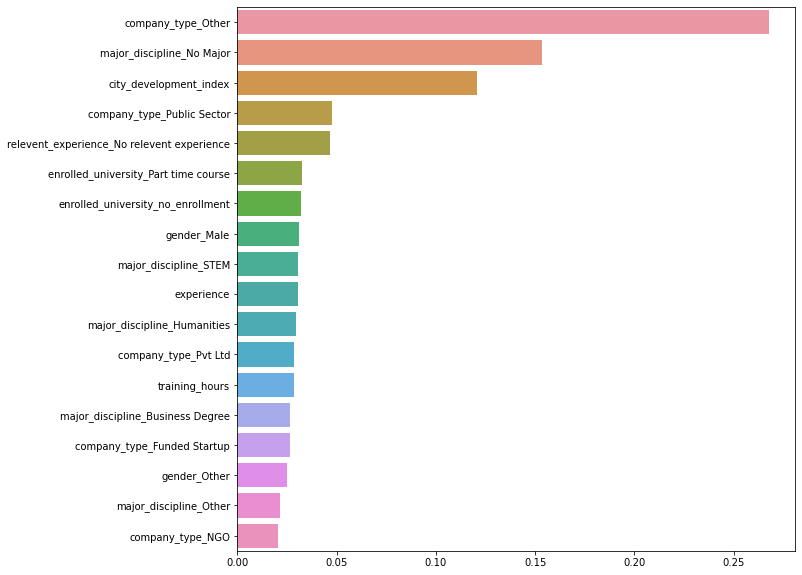

In [172]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Light GBM Classifier

In [173]:
from lightgbm import LGBMClassifier

In [174]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lgbm=LGBMClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
proba=lgbm.predict_proba(X_test)[:,1]
print("trian score : ",lgbm.score(X_train,y_train))
print("test score : ",lgbm.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr9,tpr9,thresh=roc_curve(y_test,proba)

trian score :  0.821479838183479
test score :  0.7834029227557411

confusion matrix : 
  [[2511  392]
 [ 438  491]]

precision score : 0.5560588901472253
recall score :  0.5285252960172229
auc :  0.7878240727179151

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      2903
           1       0.56      0.53      0.54       929

    accuracy                           0.78      3832
   macro avg       0.70      0.70      0.70      3832
weighted avg       0.78      0.78      0.78      3832



In [175]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [176]:
Score = Score.append({"Name":"Light GBM Classifier ",
             'Train Score':lgbm.score(X_train,y_train),
             'Test Score':lgbm.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [177]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271
4,Gradiant Boosting Classifier,0.796359,0.788361,0.576425,0.479010,0.523222,0.787418,2576,327,484,445
5,XGBoost Classifier,0.861803,0.773225,0.537594,0.461787,0.496815,0.773335,2534,369,500,429
6,Light GBM Classifier,0.821480,0.783403,0.556059,0.528525,0.541943,0.787824,2511,392,438,491


In [178]:
ser=pd.Series(lgbm.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                1088
city_development_index                         670
experience                                     589
relevent_experience_No relevent experience      92
company_type_Other                              91
enrolled_university_no_enrollment               78
gender_Male                                     64
major_discipline_STEM                           54
major_discipline_No Major                       49
company_type_Pvt Ltd                            48
company_type_Public Sector                      34
company_type_Funded Startup                     33
major_discipline_Business Degree                26
enrolled_university_Part time course            24
major_discipline_Humanities                     21
gender_Other                                    17
major_discipline_Other                          17
company_type_NGO                                 5
dtype: int64

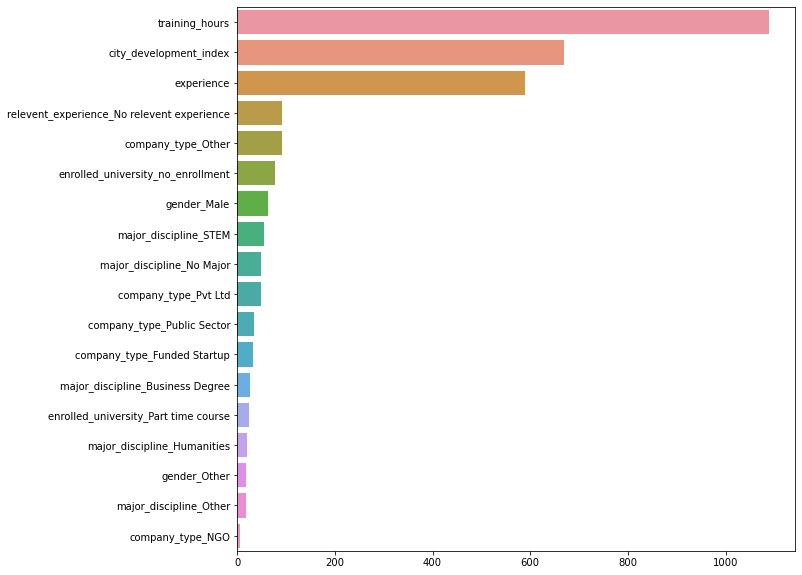

In [179]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
knn=KNeighborsClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
proba=knn.predict_proba(X_test)[:,1]
print("trian score : ",knn.score(X_train,y_train))
print("test score : ",knn.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr10,tpr10,thresh=roc_curve(y_test,proba)

trian score :  0.8114315542215842
test score :  0.7372129436325678

confusion matrix : 
  [[2594  309]
 [ 698  231]]

precision score : 0.42777777777777776
recall score :  0.24865446716899892
auc :  0.6434911807576662

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      2903
           1       0.43      0.25      0.31       929

    accuracy                           0.74      3832
   macro avg       0.61      0.57      0.58      3832
weighted avg       0.70      0.74      0.71      3832



In [182]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [183]:
Score = Score.append({"Name":"K Nearest Neighbor Classifier ",
             'Train Score':knn.score(X_train,y_train),
             'Test Score':knn.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [184]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271
4,Gradiant Boosting Classifier,0.796359,0.788361,0.576425,0.479010,0.523222,0.787418,2576,327,484,445
5,XGBoost Classifier,0.861803,0.773225,0.537594,0.461787,0.496815,0.773335,2534,369,500,429
6,Light GBM Classifier,0.821480,0.783403,0.556059,0.528525,0.541943,0.787824,2511,392,438,491
7,K Nearest Neighbor Classifier,0.811432,0.737213,0.427778,0.248654,0.314500,0.643491,2594,309,698,231


# Naive Bayes 

In [185]:
from sklearn.naive_bayes import GaussianNB

In [186]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
nb=GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
proba=nb.predict_proba(X_test)[:,1]
print("trian score : ",nb.score(X_train,y_train))
print("test score : ",nb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr11,tpr11,thresh=roc_curve(y_test,proba)

trian score :  0.7398538431423725
test score :  0.7239039665970772

confusion matrix : 
  [[2235  668]
 [ 390  539]]

precision score : 0.44656172328086163
recall score :  0.5801937567276642
auc :  0.7055801744752375

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2903
           1       0.45      0.58      0.50       929

    accuracy                           0.72      3832
   macro avg       0.65      0.68      0.66      3832
weighted avg       0.75      0.72      0.73      3832



In [187]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [188]:
Score = Score.append({"Name":"Naive Bayes Classifier ",
             'Train Score':nb.score(X_train,y_train),
             'Test Score':nb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [189]:
# this table represents all the scores of the models found above 
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.766802,0.765658,0.538847,0.231432,0.323795,0.761074,2719,184,714,215
1,Decision Tree,0.986559,0.716858,0.416488,0.418730,0.417606,0.619810,2358,545,540,389
2,Random Forest Classifier,0.986559,0.766962,0.523936,0.424112,0.468769,0.757278,2545,358,535,394
3,AdaBoost Classifier,0.776589,0.778445,0.586580,0.291712,0.389648,0.784991,2712,191,658,271
4,Gradiant Boosting Classifier,0.796359,0.788361,0.576425,0.479010,0.523222,0.787418,2576,327,484,445
5,XGBoost Classifier,0.861803,0.773225,0.537594,0.461787,0.496815,0.773335,2534,369,500,429
6,Light GBM Classifier,0.821480,0.783403,0.556059,0.528525,0.541943,0.787824,2511,392,438,491
7,K Nearest Neighbor Classifier,0.811432,0.737213,0.427778,0.248654,0.314500,0.643491,2594,309,698,231
8,Naive Bayes Classifier,0.739854,0.723904,0.446562,0.580194,0.504682,0.705580,2235,668,390,539


# PLOT AUC ROC

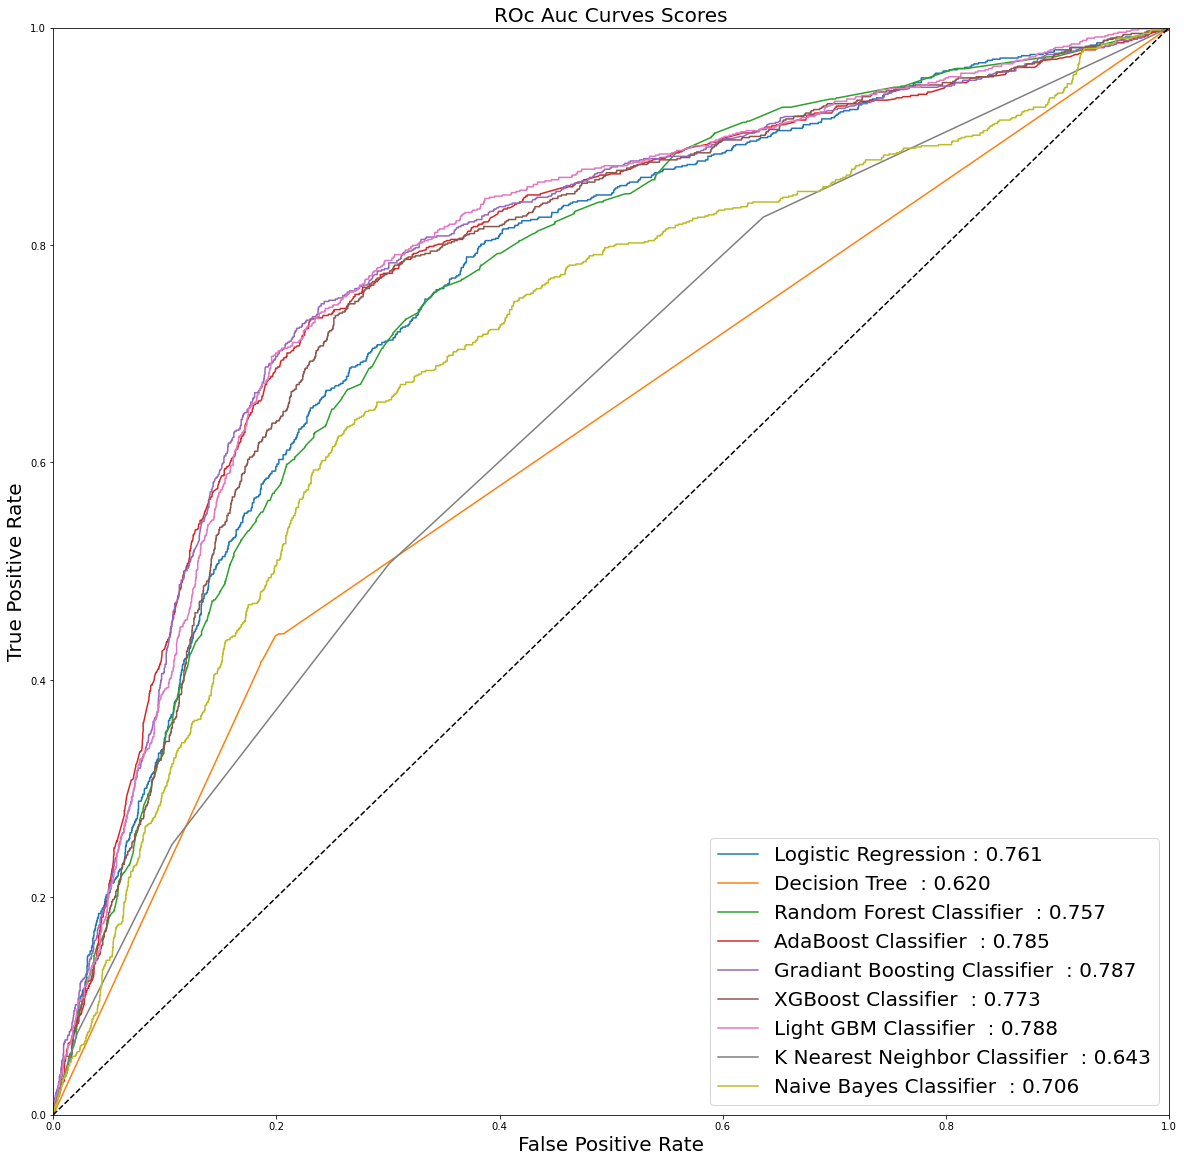

In [190]:
plt.figure(figsize=(20,20))
plt.plot(fpr0,tpr0,label="{0} : {1:.3f}".format(Score["Name"][0],auc(fpr0,tpr0)))
plt.plot(fpr2,tpr2,label="{0} : {1:.3f}".format(Score["Name"][1],auc(fpr2,tpr2)))
plt.plot(fpr4,tpr4,label="{0} : {1:.3f}".format(Score["Name"][2],auc(fpr4,tpr4)))
plt.plot(fpr6,tpr6,label="{0} : {1:.3f}".format(Score["Name"][3],auc(fpr6,tpr6)))
plt.plot(fpr7,tpr7,label="{0} : {1:.3f}".format(Score["Name"][4],auc(fpr7,tpr7)))
plt.plot(fpr8,tpr8,label="{0} : {1:.3f}".format(Score["Name"][5],auc(fpr8,tpr8)))
plt.plot(fpr9,tpr9,label="{0} : {1:.3f}".format(Score["Name"][6],auc(fpr9,tpr9)))
plt.plot(fpr10,tpr10,label="{0} : {1:.3f}".format(Score["Name"][7],auc(fpr10,tpr10)))
plt.plot(fpr11,tpr11,label="{0} : {1:.3f}".format(Score["Name"][8],auc(fpr11,tpr11)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROc Auc Curves Scores',size=20)
plt.legend(loc="lower right",prop={'size':20})
plt.show()

### Random Over Sampler 

In [191]:
from imblearn.over_sampling import RandomOverSampler


In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape

(15326, 18)

In [193]:
hr1=hr.copy()
os=RandomOverSampler(random_state=10)
X=hr1.drop("job_change",axis=1)
y=hr1["job_change"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train,y_train=os.fit_resample(X_train,y_train)

In [194]:
X_train.shape

(22956, 18)

## Final Models after over sampling

In [195]:
# all libraries
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve,KFold
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [196]:
 from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [197]:

#dataframe for all the data collected 
Score=pd.DataFrame(columns=["Name","Train Score","Test Score","Precision Score","Recall Score","F1-Score","ROC - AUC","TN","FP","FN","TP","FPR","TPR"])

Score.head(1)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP,FPR,TPR


LogisticRegression()


train score :  0.7144101759888483
test score :  0.7038100208768268

confusion matrix : 
  [[2039  864]
 [ 271  658]]

precision score : 0.4323258869908016
recall score :  0.7082884822389667
auc :  0.7600959921568831

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      2903
           1       0.43      0.71      0.54       929

    accuracy                           0.70      3832
   macro avg       0.66      0.71      0.66      3832
weighted avg       0.77      0.70      0.72      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major_discipline_No 

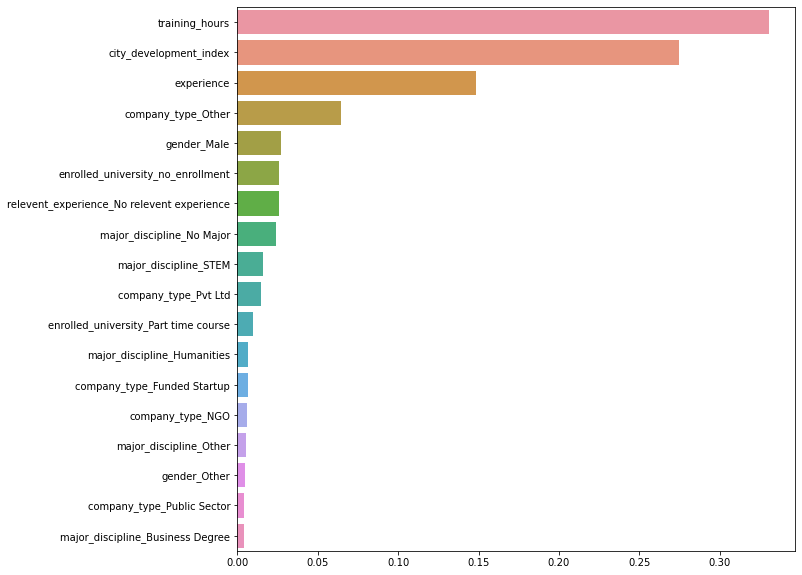


DecisionTreeClassifier(random_state=10)


train score :  0.9888917929952954
test score :  0.7090292275574113

confusion matrix : 
  [[2320  583]
 [ 532  397]]

precision score : 0.4051020408163265
recall score :  0.42734122712594186
auc :  0.6134359726603302

classification report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      2903
           1       0.41      0.43      0.42       929

    accuracy                           0.71      3832
   macro avg       0.61      0.61      0.61      3832
weighted avg       0.71      0.71      0.71      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953

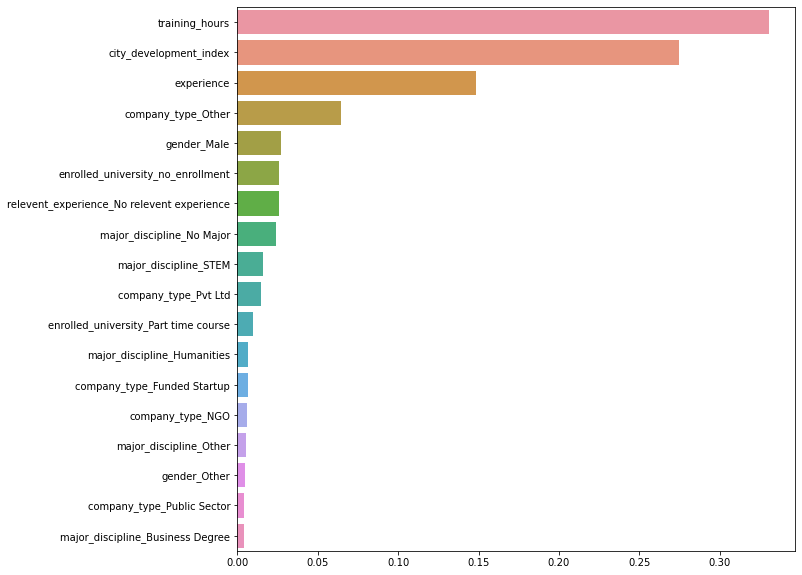


RandomForestClassifier(random_state=10)


train score :  0.9888917929952954
test score :  0.7531315240083507

confusion matrix : 
  [[2420  483]
 [ 463  466]]

precision score : 0.4910432033719705
recall score :  0.5016146393972013
auc :  0.7474287947548415

classification report : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      2903
           1       0.49      0.50      0.50       929

    accuracy                           0.75      3832
   macro avg       0.67      0.67      0.67      3832
weighted avg       0.75      0.75      0.75      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953


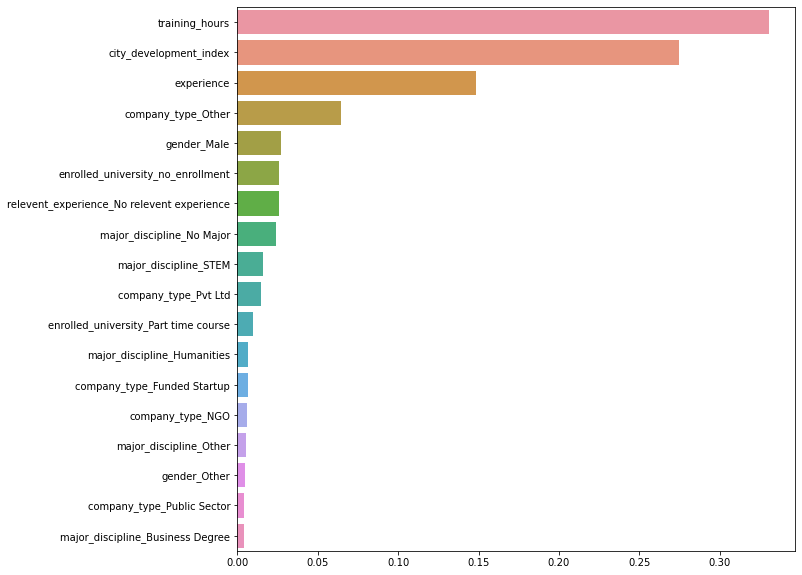


[18:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


train score :  0.8507144101759888
test score :  0.7580897703549061

confusion matrix : 
  [[2294  609]


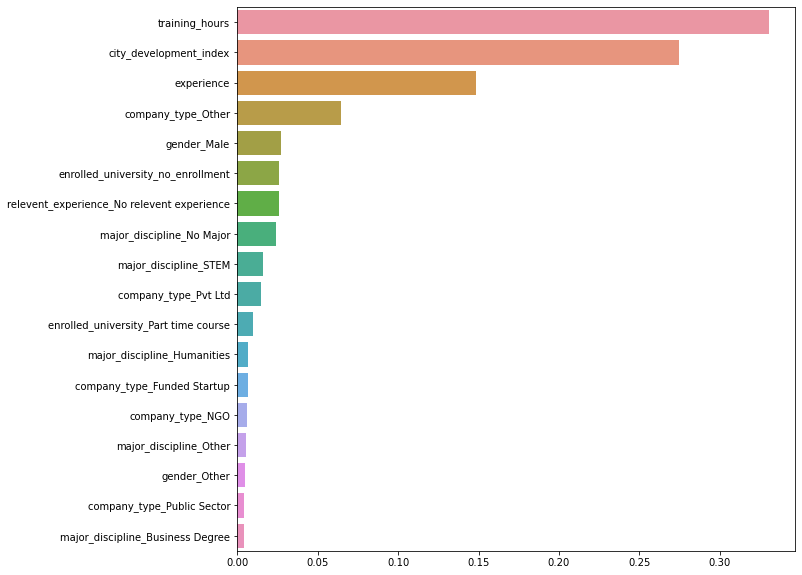


LGBMClassifier(random_state=10)


train score :  0.7986147412441191
test score :  0.764874739039666

confusion matrix : 
  [[2267  636]
 [ 265  664]]

precision score : 0.5107692307692308
recall score :  0.7147470398277718
auc :  0.7895290014005036

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      2903
           1       0.51      0.71      0.60       929

    accuracy                           0.76      3832
   macro avg       0.70      0.75      0.72      3832
weighted avg       0.80      0.76      0.78      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major_dis

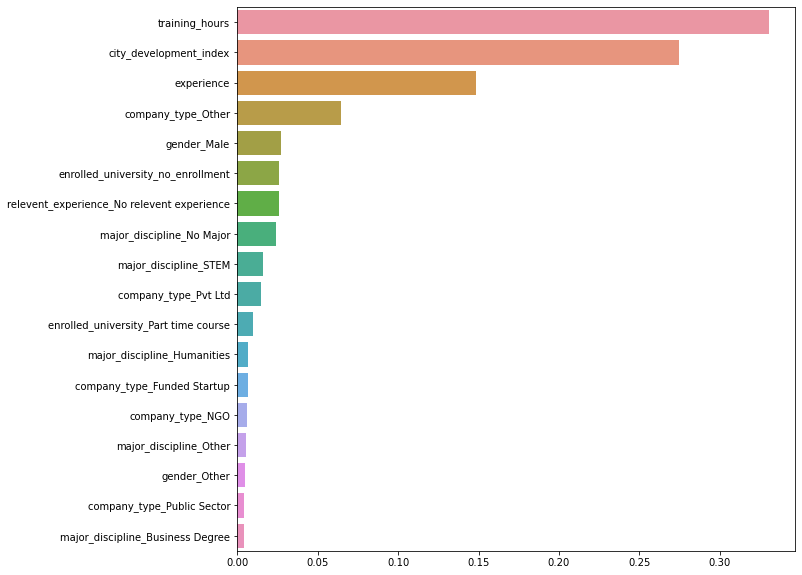


GaussianNB()


train score :  0.6882732183307196
test score :  0.6450939457202505

confusion matrix : 
  [[1815 1088]
 [ 272  657]]

precision score : 0.3765042979942693
recall score :  0.7072120559741658
auc :  0.6997682884006634

classification report : 
               precision    recall  f1-score   support

           0       0.87      0.63      0.73      2903
           1       0.38      0.71      0.49       929

    accuracy                           0.65      3832
   macro avg       0.62      0.67      0.61      3832
weighted avg       0.75      0.65      0.67      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major_discipline_No Major  

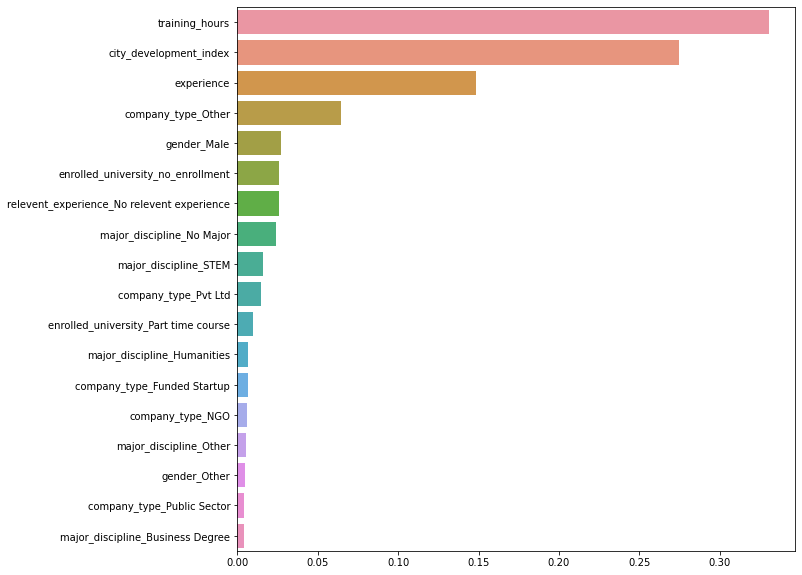


GradientBoostingClassifier(random_state=10)


train score :  0.7680345007841087
test score :  0.7633089770354906

confusion matrix : 
  [[2253  650]
 [ 257  672]]

precision score : 0.5083207261724659
recall score :  0.7233584499461787
auc :  0.7879738750641018

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      2903
           1       0.51      0.72      0.60       929

    accuracy                           0.76      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.76      0.78      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025

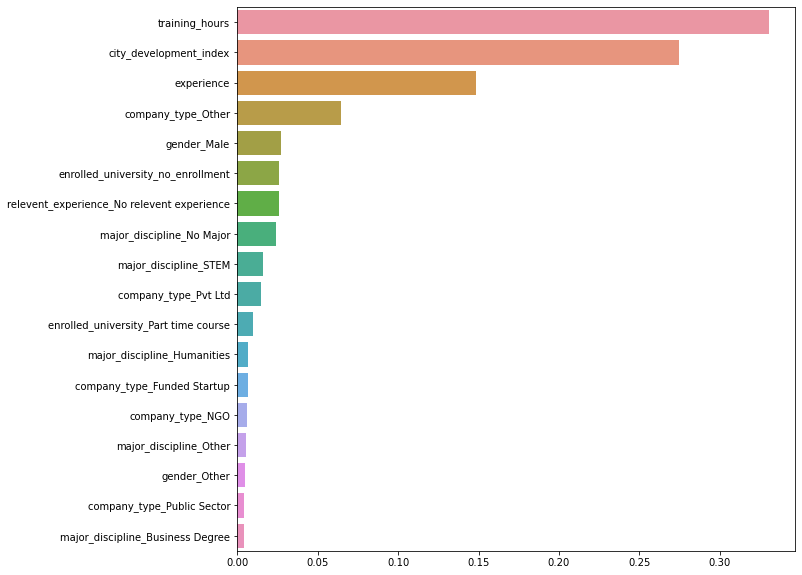


AdaBoostClassifier(random_state=10)


train score :  0.756577801010629
test score :  0.752348643006263

confusion matrix : 
  [[2211  692]
 [ 257  672]]

precision score : 0.49266862170087977
recall score :  0.7233584499461787
auc :  0.7827836316464131

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      2903
           1       0.49      0.72      0.59       929

    accuracy                           0.75      3832
   macro avg       0.69      0.74      0.70      3832
weighted avg       0.80      0.75      0.77      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major

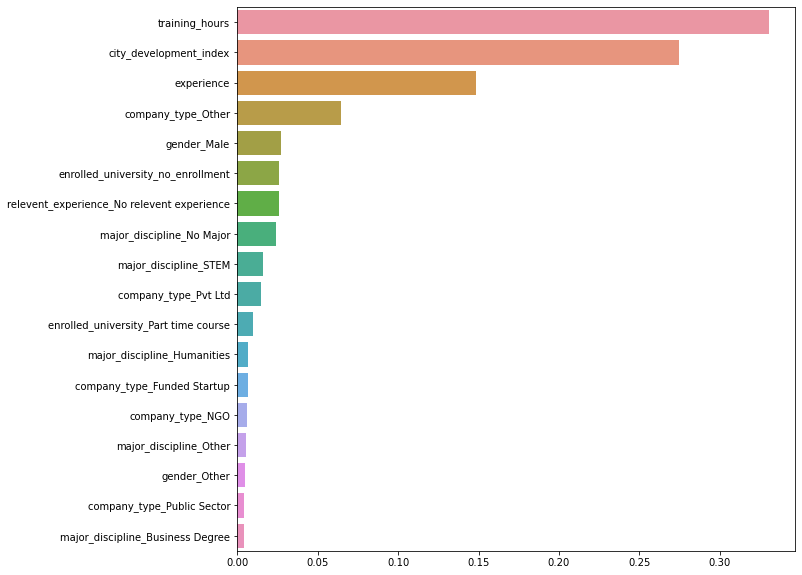


KNeighborsClassifier()


train score :  0.8299790904338735
test score :  0.6143006263048016

confusion matrix : 
  [[1838 1065]
 [ 413  516]]

precision score : 0.32637571157495254
recall score :  0.5554359526372443
auc :  0.6296841506522148

classification report : 
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      2903
           1       0.33      0.56      0.41       929

    accuracy                           0.61      3832
   macro avg       0.57      0.59      0.56      3832
weighted avg       0.70      0.61      0.64      3832



training_hours                                0.330308
city_development_index                        0.274543
experience                                    0.148541
company_type_Other                            0.064683
gender_Male                                   0.027189
enrolled_university_no_enrollment             0.026017
relevent_experience_No relevent experience    0.025953
major_discipline

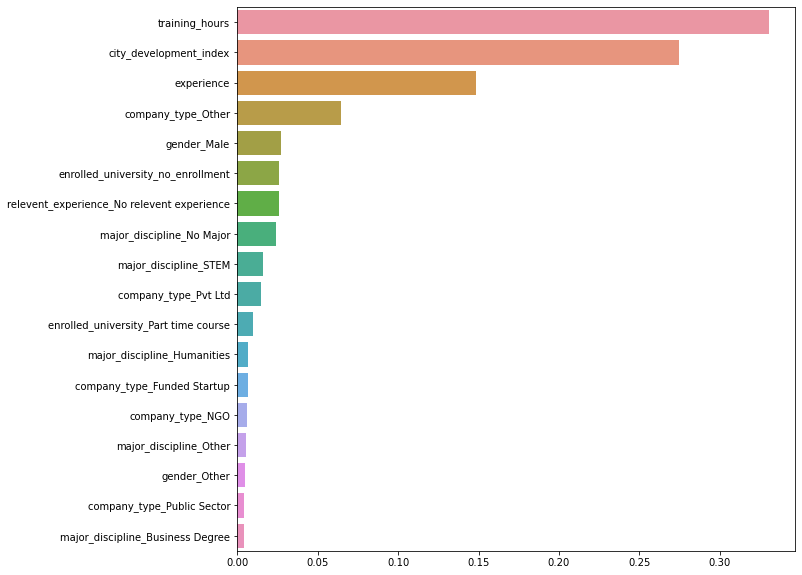

In [198]:
a=['LogisticRegression()','DecisionTreeClassifier()','RandomForestClassifier()','XGBClassifier()','LGBMClassifier()',
    'GaussianNB()','GradientBoostingClassifier()','AdaBoostClassifier()','KNeighborsClassifier()']

li=[LogisticRegression(),DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),XGBClassifier(random_state=10)
    ,LGBMClassifier(random_state=10),
    GaussianNB(),GradientBoostingClassifier(random_state=10),AdaBoostClassifier(random_state=10),KNeighborsClassifier()]
for i,j in zip(li,a):
    pipe= Pipeline([['classifier', i]])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    proba=pipe.predict_proba(X_test)[:,1]
    print(i)
    print()
    print()
    print("train score : ",pipe.score(X_train,y_train))
    print("test score : ",pipe.score(X_test,y_test))
    print()
    cm=confusion_matrix(y_test,y_pred)
    print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
    print()
    print("precision score :",precision_score(y_test,y_pred))
    print("recall score : ",recall_score(y_test,y_pred))
    print("auc : ",roc_auc_score(y_test,proba))
    print()
    print("classification report : \n",classification_report(y_test,y_pred))
    fpr1,tpr1,thresh=roc_curve(y_test,proba)
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TP=cm[1,1]
    Score = Score.append({"Name":j,
                 'Train Score':pipe.score(X_train,y_train),
                 'Test Score':pipe.score(X_test,y_test),
                 'Precision Score':precision_score(y_test,y_pred),
                 'Recall Score':recall_score(y_test,y_pred),
                 'F1-Score':f1_score(y_test,y_pred),
                'ROC - AUC':roc_auc_score(y_test,proba),
                 'TN':TN,'FP':FP, 'FN':FN, 'TP':TP,"fpr":fpr1,"tpr":tpr1},ignore_index=True)
    print()
    print()
    if i=='LogisticRegression()':
        ser=pd.Series(np.exp(lr.coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
        print(ser)
        plt.figure(figsize=(10,10))
        sns.barplot(ser.values,ser.index);
        plt.show()
        print()
    elif i in['KNeighborsClassifier()','GaussianNB()']:
        print()
        pass
    else:
        ser=pd.Series(dt.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
        print(ser)
        plt.figure(figsize=(10,10))
        sns.barplot(ser.values,ser.index);
        plt.show()
        print()
        


In [199]:
Score[["Name","Train Score","Test Score","Precision Score","Recall Score","F1-Score","ROC - AUC","TN","FP","FN","TP"]]

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,LogisticRegression(),0.714410,0.703810,0.432326,0.708288,0.536924,0.760096,2039,864,271,658
1,DecisionTreeClassifier(),0.988892,0.709029,0.405102,0.427341,0.415925,0.613436,2320,583,532,397
2,RandomForestClassifier(),0.988892,0.753132,0.491043,0.501615,0.496273,0.747429,2420,483,463,466
3,XGBClassifier(),0.850714,0.758090,0.500820,0.657696,0.568637,0.772397,2294,609,318,611
4,LGBMClassifier(),0.798615,0.764875,0.510769,0.714747,0.595783,0.789529,2267,636,265,664
5,GaussianNB(),0.688273,0.645094,0.376504,0.707212,0.491399,0.699768,1815,1088,272,657
6,GradientBoostingClassifier(),0.768035,0.763309,0.508321,0.723358,0.597068,0.787974,2253,650,257,672
7,AdaBoostClassifier(),0.756578,0.752349,0.492669,0.723358,0.586132,0.782784,2211,692,257,672
8,KNeighborsClassifier(),0.829979,0.614301,0.326376,0.555436,0.411155,0.629684,1838,1065,413,516


# PLOT AUC ROC

In [200]:
Score.iloc[0]["TP"]

658

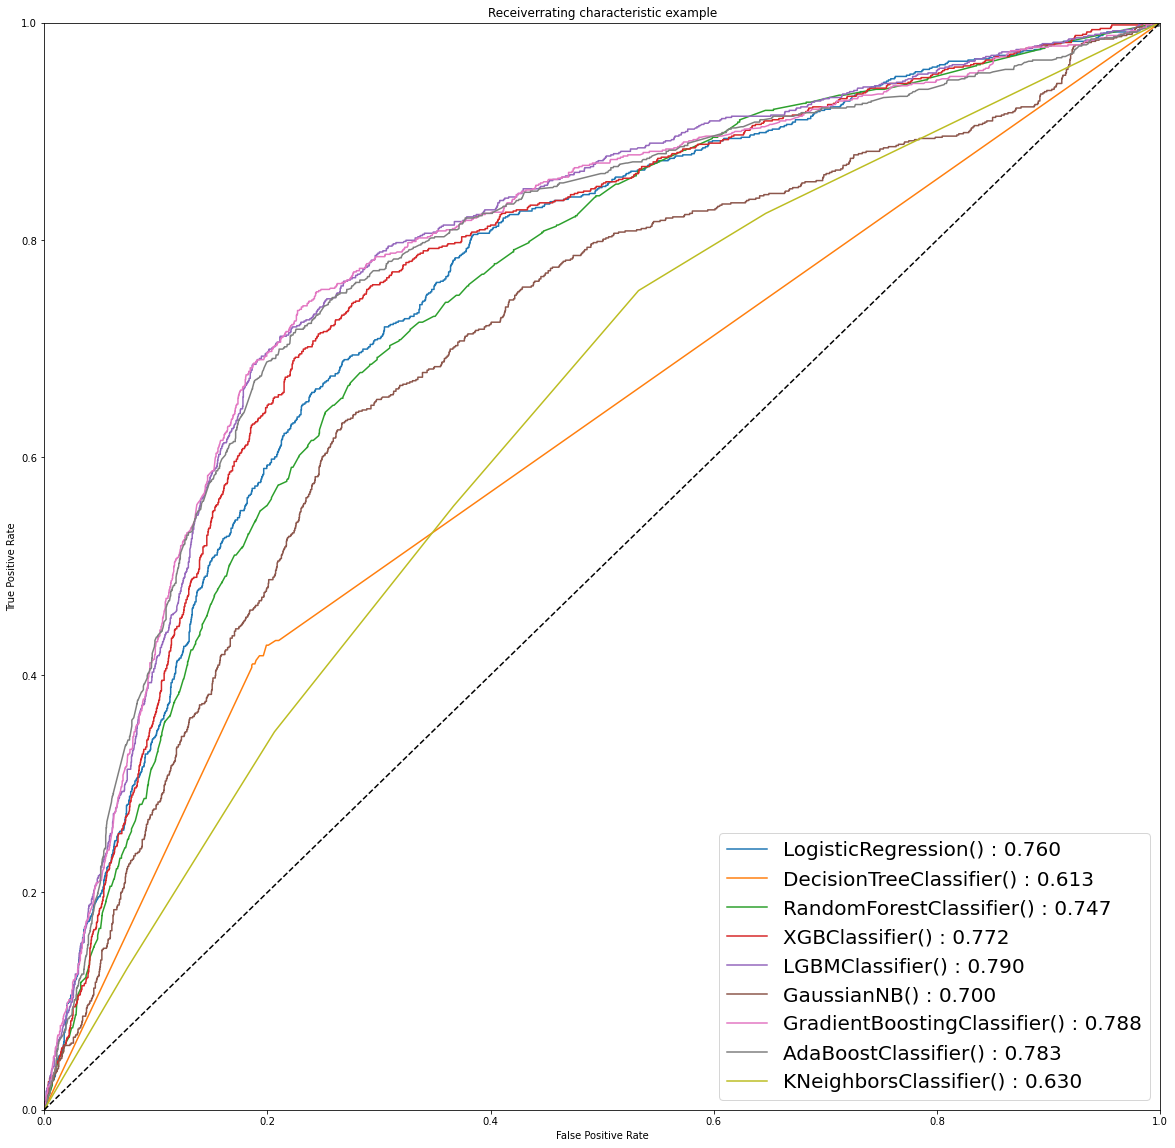

In [201]:
plt.figure(figsize=(20,20))
plt.plot(Score.iloc[0]["fpr"],Score.iloc[0]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][0],auc(Score.iloc[0]["fpr"],Score.iloc[0]["tpr"])))
plt.plot(Score.iloc[1]["fpr"],Score.iloc[1]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][1],auc(Score.iloc[1]["fpr"],Score.iloc[1]["tpr"])))
plt.plot(Score.iloc[2]["fpr"],Score.iloc[2]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][2],auc(Score.iloc[2]["fpr"],Score.iloc[2]["tpr"])))
plt.plot(Score.iloc[3]["fpr"],Score.iloc[3]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][3],auc(Score.iloc[3]["fpr"],Score.iloc[3]["tpr"])))
plt.plot(Score.iloc[4]["fpr"],Score.iloc[4]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][4],auc(Score.iloc[4]["fpr"],Score.iloc[4]["tpr"])))
plt.plot(Score.iloc[5]["fpr"],Score.iloc[5]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][5],auc(Score.iloc[5]["fpr"],Score.iloc[5]["tpr"])))
plt.plot(Score.iloc[6]["fpr"],Score.iloc[6]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][6],auc(Score.iloc[6]["fpr"],Score.iloc[6]["tpr"])))
plt.plot(Score.iloc[7]["fpr"],Score.iloc[7]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][7],auc(Score.iloc[7]["fpr"],Score.iloc[7]["tpr"])))
plt.plot(Score.iloc[8]["fpr"],Score.iloc[8]["tpr"],label="{0} : {1:.3f}".format(Score["Name"][8],auc(Score.iloc[8]["fpr"],Score.iloc[8]["tpr"])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right",prop={'size':20})
plt.show()

Model Comparision

In [201]:
model=[LogisticRegression(),DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),AdaBoostClassifier(random_state=10),GradientBoostingClassifier(random_state=10),XGBClassifier(random_state=10),KNeighborsClassifier(),GaussianNB()]
name=["lr","dt","rf","ab","gb","xgb","knn","nb"]

models=list(zip(model,name))

models

##### here models of both train and test have been compared for different metrics for comparision

plt.rcParams['figure.figsize'] = (20, 10)
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

lr: 0.698419 (0.018886)
dt: 0.877437 (0.076622)
rf: 0.896775 (0.066229)
ab: 0.745205 (0.019846)
gb: 0.756401 (0.018695)
[15:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_

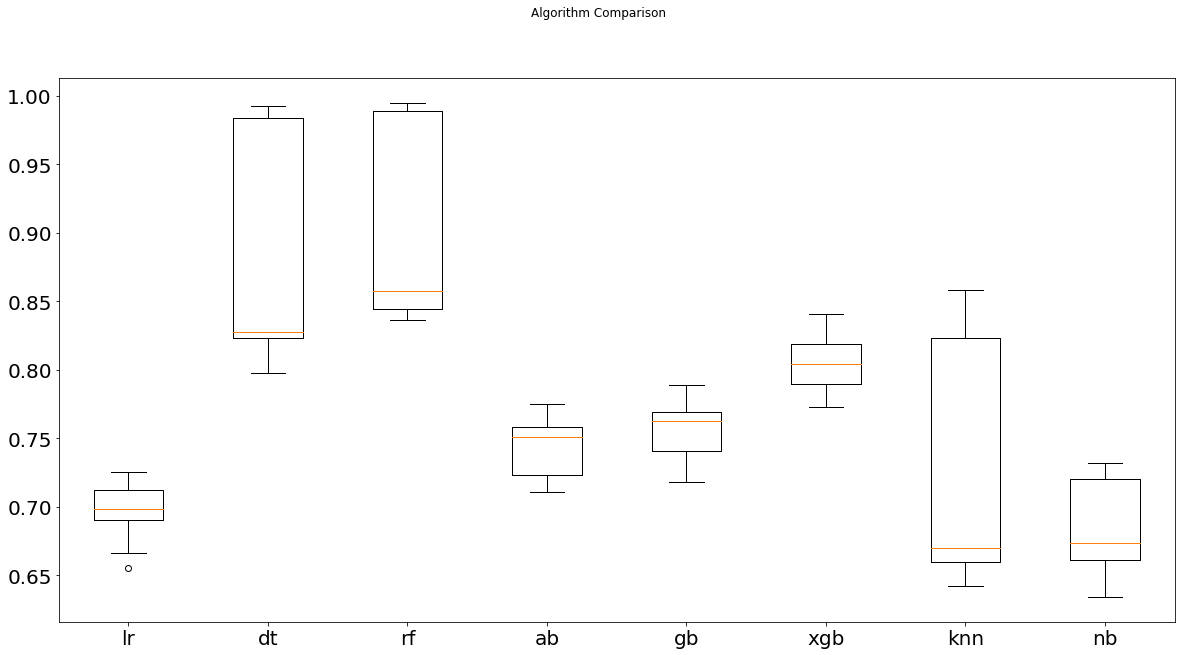

In [202]:
# train accuracy after over sampling

results = []
names = []
scoring = 'accuracy'
for model,name in models:
	kfold = KFold(n_splits=20)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



lr: 0.196902 (0.043316)
dt: 0.423750 (0.066451)
rf: 0.356588 (0.068970)
ab: 0.252928 (0.061462)
gb: 0.387444 (0.087898)
[15:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_

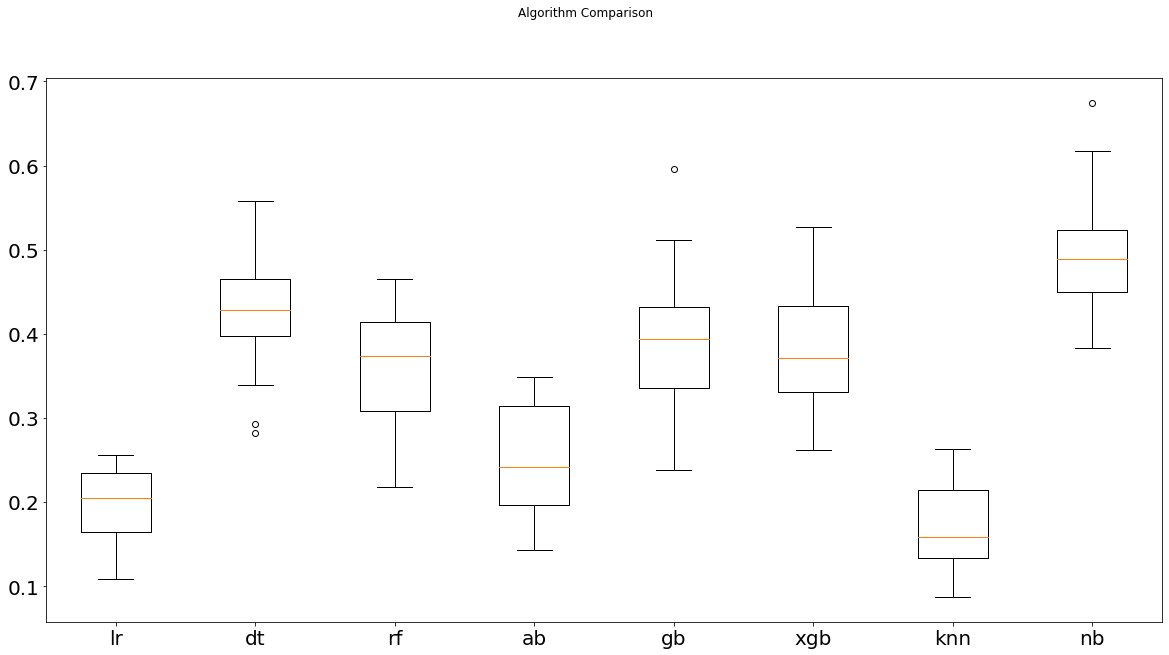

In [203]:
# Test recall

results = []
names = []
scoring = 'recall'
for model,name in models:
	kfold = KFold(n_splits=20)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

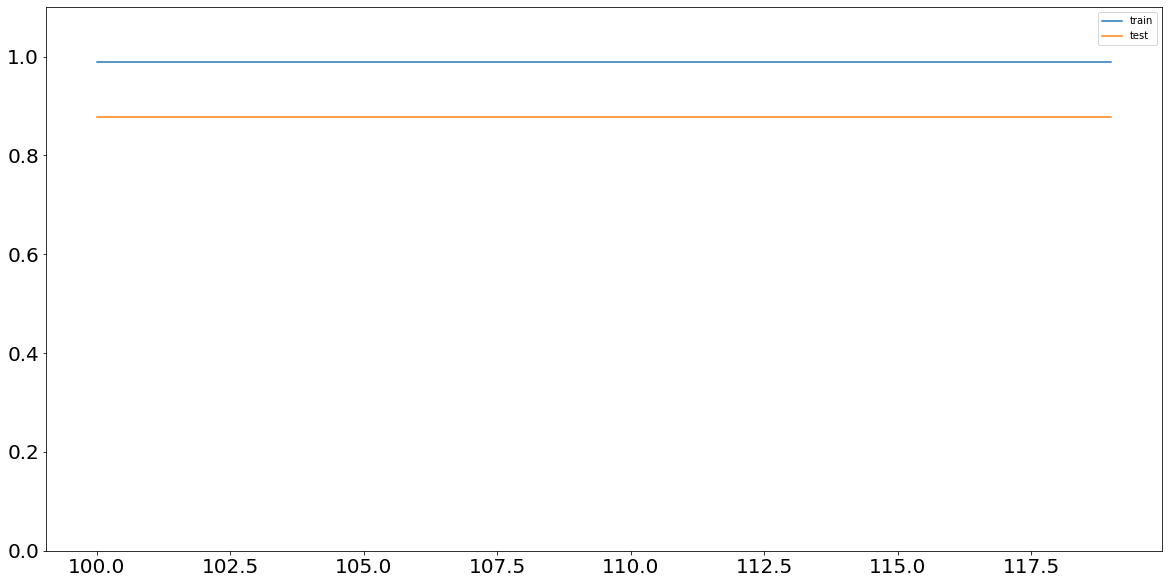

In [208]:
param_range=np.arange(100,120)
train,test=validation_curve(GradientBoostingClassifier(random_state=10),X_train,y_train,param_name="max_depth",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])
plt.legend()
plt.show()

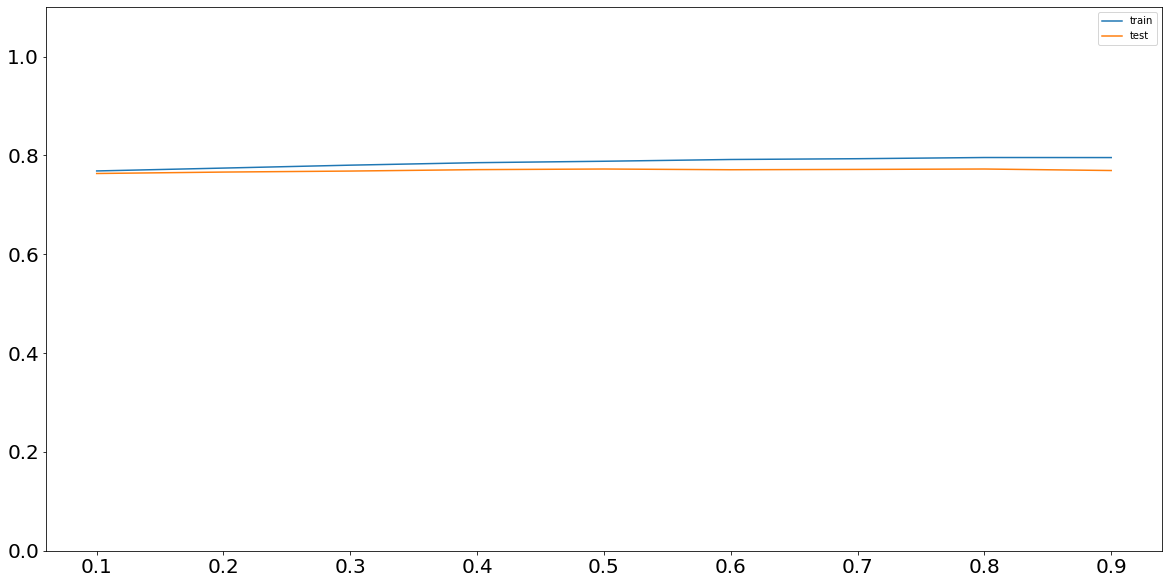

In [210]:
param_range=np.arange(0,1,0.1)
train,test=validation_curve(GradientBoostingClassifier(random_state=10),X_train,y_train,param_name="learning_rate",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

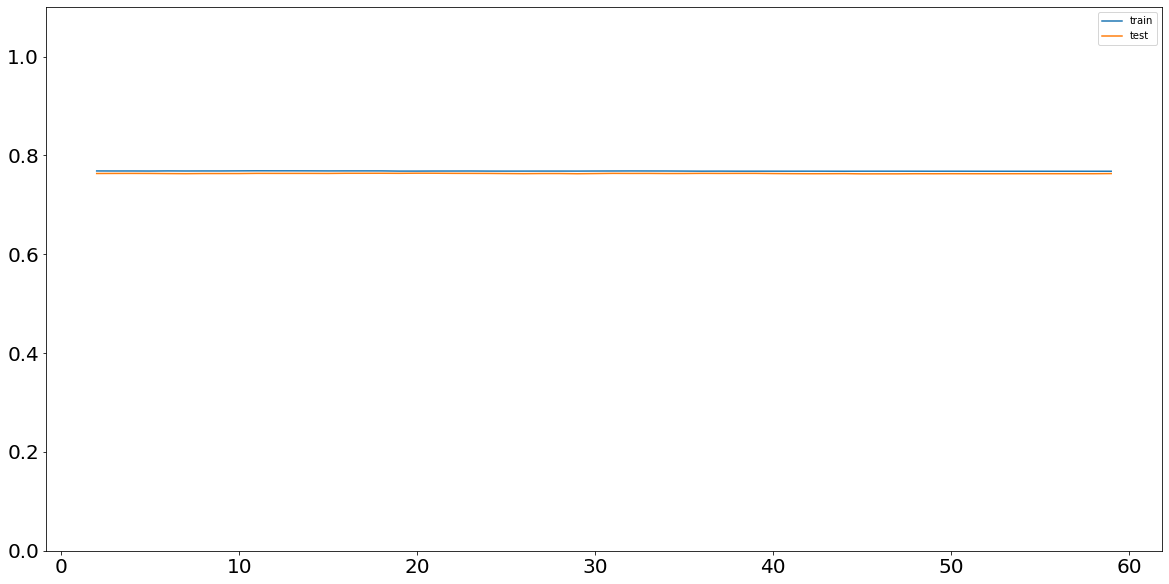

In [211]:
param_range=np.arange(1,60)
train,test=validation_curve(GradientBoostingClassifier(random_state=10),X_train,y_train,param_name="min_samples_split",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])
plt.legend()
plt.show()

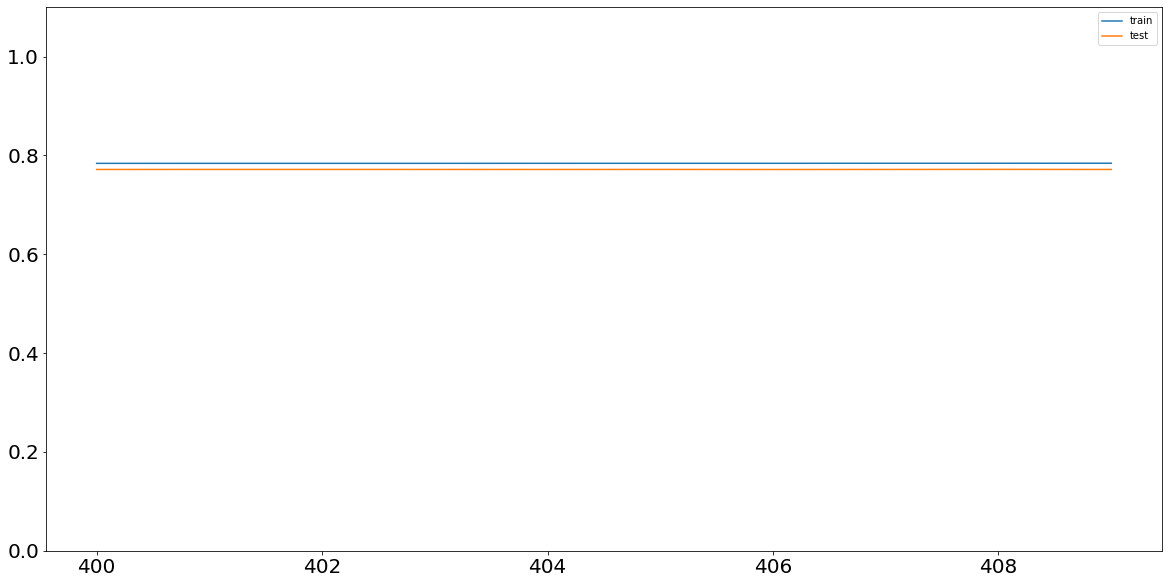

In [209]:
param_range=np.arange(400,410)
train,test=validation_curve(GradientBoostingClassifier(random_state=10),X_train,y_train,param_name="n_estimators",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

## Grid search cv

In [213]:
from sklearn.model_selection import GridSearchCV

In [215]:
params={'n_estimators':np.arange(400,410),'learning_rate':np.arange(0.1,0.15,0.01),'min_samples_split':np.arange(2,5)}
gs_rf=GridSearchCV(GradientBoostingClassifier(random_state=10),params,cv=5,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)#accuracy

{'learning_rate': 0.13999999999999999, 'min_samples_split': 3, 'n_estimators': 400}
0.7753092609612657


In [216]:
params={'n_estimators':np.arange(400,410),'learning_rate':np.arange(0.1,0.15,0.01),'min_samples_split':np.arange(2,5)}
gs_rf=GridSearchCV(GradientBoostingClassifier(random_state=10),params,cv=5,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)#recall

{'learning_rate': 0.13999999999999999, 'min_samples_split': 3, 'n_estimators': 400}
0.7753092609612657


## Final model

In [205]:
gb=GradientBoostingClassifier(n_estimators=400,learning_rate=0.133,min_samples_split=3,random_state=11)

pipe= Pipeline([['classifier',gb]])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("train score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr1,tpr1,thresh=roc_curve(y_test,proba)

train score :  0.7880292733925771
test score :  0.7596555323590815

confusion matrix : 
  [[2244  659]
 [ 262  667]]

precision score : 0.5030165912518854
recall score :  0.7179763186221744
auc :  0.7815700101635701

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      2903
           1       0.50      0.72      0.59       929

    accuracy                           0.76      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.76      0.77      3832



In [206]:
rf=GradientBoostingClassifier(n_estimators=85,learning_rate=0.1,min_samples_split=2,random_state=11)
cross_val_score(rf,X_train,y_train,cv=10,scoring="accuracy")

array([0.76698606, 0.76175958, 0.75740418, 0.76872822, 0.74825784,
       0.75958188, 0.77734205, 0.75337691, 0.75991285, 0.7708061 ])

In [207]:
gb=GradientBoostingClassifier(n_estimators=85,learning_rate=0.1,min_samples_split=2,random_state=11)
cross_val_score(gb,X_train,y_train,cv=10,scoring="recall")

array([0.76916376, 0.72735192, 0.73867596, 0.76045296, 0.7325784 ,
       0.73170732, 0.76547515, 0.74542284, 0.74651568, 0.77003484])

hyper parameter tuning lead to 1 % increase accuracy